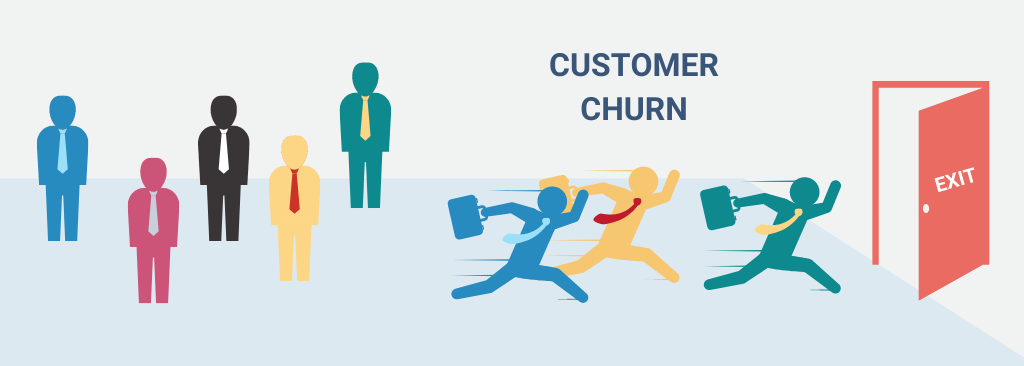

# Indtroduction

**E-commerce customer churn prediction**


Churn prediction is identifying customers that are most likely to live a service. This is important for most companies as acquiring new customers is more costlier than retaining old ones, So the results of Churn prediction help companies focus on customers that are likely to churn and develop strategies for retaining those customers.

# **Problem to focus on**

One of the important problems in the online buying and selling business is how companies can keep their consumers loyal and not move to other companies' online platforms. Consumers are the company's main asset, so one way companies retain consumers is by predicting customer churn. By making predictions, companies are able to identify potential customers (customer retention) so that the company can implement appropriate marketing strategies such as providing discount promotions or cashback to customers who have the potential to churn so as to prevent these customers from stopping purchases and moving to competing companies (churn).

With this customer churn prediction model, companies can minimize losses due to losing a number of customers because the company is able to identify customers who are loyal and who are not. So the costs incurred to attract new customers can be avoided by retaining loyal customers where the costs of retaining existing customers are relatively lower than attracting new customers.

**our project goal **


*   To propose commercial actions aimed at maintaining
clients that are showing signs of
churn and offer them customised offers.
*    To develop prediction models for the customer churns in Ecommerce Company, analysing
different attributes related to customer churn



In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #missing values
import plotly.express as px
from scipy.stats import zscore
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec


Mounted at /content/drive


In [ ]:

!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


About the dataset

This is a dataset of leading ecommerce company and we have analysis who are churn(leaving the company service) and have to make predicting churn model.

In [2]:
df_original=pd.read_csv("/content/customer churn prediction .csv")


# **Data Collection**
The data is collected for this project from Kaggle for an e-commerce website. The empirical study
starts in June 2021, and the observation ends in November 2021. The consumption data of
customers who purchased goods on the website is selected for analysis and prediction. The dataset
contains customer’s consumption records in addition to historical behavioural interactions while
using the platform.

In [ ]:
df_original

In [ ]:
df_original.head()

In [ ]:
df_original.shape

In [ ]:
df_original.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns


 The effectiveness of this data is that it contains some specific detailed attributes which will help in
customer segmentation such as: preferred login device, Satisfaction store and other attributes.

# Exploratory data analysis

**we will focus on the following first so that we  continue to other section**

1.  Visualize the distribution of numerical features using histograms or kernel density plots.

2.   Explore categorical features using bar charts or count plots to understand their frequencies and distributions.

3.    Use scatteplots or pair plots to identify relationships between numerical features.
4.   Analyze correlations between features using correlation matrices or heatmaps.
5.   Identify outliers or anomalies in the data and decide how to handle them.



In [ ]:
daf=df_original.copy()
daf

In [ ]:
df_original.columns


Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:

churn_sum = df_original['Churn'].sum()

print(f'The sum of churn is: {churn_sum}')


The sum of churn is: 948


In [ ]:
df_original.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [ ]:
fig = px.histogram(daf, x='Tenure', color='Churn', marginal='box', title='Distribution of Tenure by Churn')
fig.show()

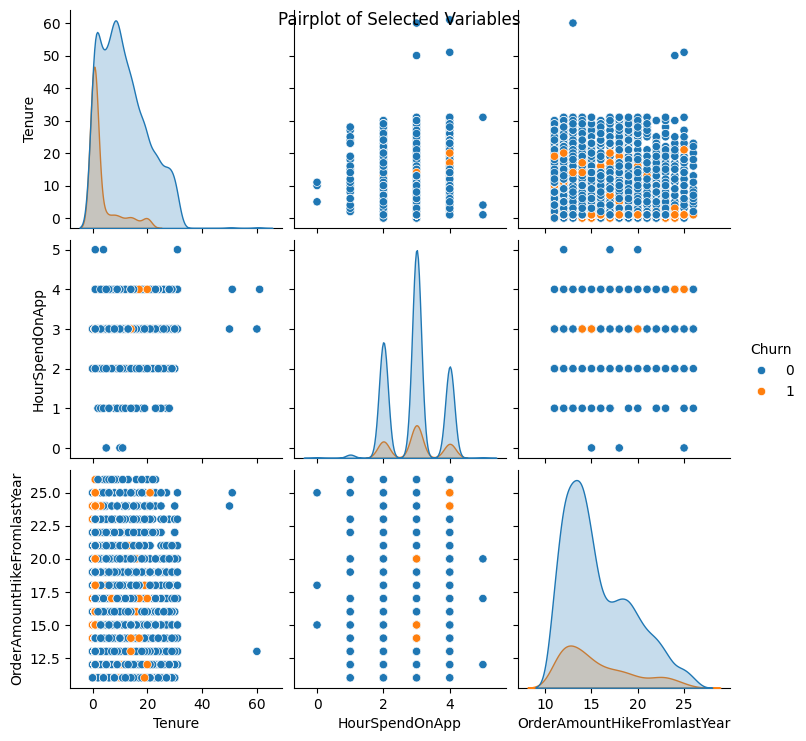

In [ ]:
sns.pairplot(daf[['Tenure', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

In [ ]:
fig = px.scatter(daf, x='HourSpendOnApp', y='OrderCount', color='Churn', hover_data=['Tenure'], title='Hour Spend on App vs. Order Count')
fig.show()

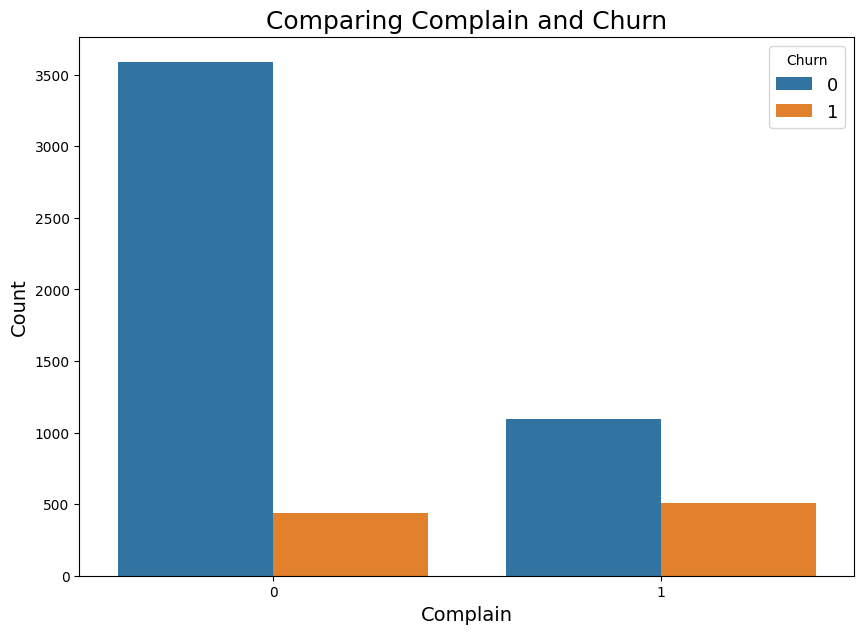

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Complain", hue="Churn", data=df_original)

plt.title('Comparing Complain and Churn', fontsize=18)
plt.xlabel('Complain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', prop={'size': 13}, loc='upper right')

total_counts = len(df_original)

**Insights**
1. Customers with the highest churn
are on customer complaints.
2. Customers with the lowest churn of
non-complaining customers.

The more customer complaints increase, the
higher the churn rate.


In [5]:


# Order Count vs Churn
fig_order_count = px.box(df_original, x='Churn', y='OrderCount', color='Churn', points='all', title='Order Count vs Churn')
fig_order_count.update_traces(quartilemethod="inclusive")
fig_order_count.show()



In [6]:

# Satisfaction Score vs Churn
fig_satisfaction = px.box(df_original, x='Churn', y='SatisfactionScore', color='Churn', points='all', title='Satisfaction Score vs Churn')
fig_satisfaction.update_traces(quartilemethod="inclusive")
fig_satisfaction.show()



In [8]:
# Days Since Last Order vs Churn
fig_days_since_order = px.box(df_original, x='Churn', y='DaySinceLastOrder', color='Churn', points='all', title='Days Since Last Order vs Churn')
fig_days_since_order.update_traces(quartilemethod="inclusive")
fig_days_since_order.show()



In [10]:
# Preferred Payment Method vs Churn
fig_payment_method = px.histogram(df_original, x='PreferredPaymentMode', color='Churn', title='Preferred Payment Method vs Churn', barmode='group')
fig_payment_method.update_layout(bargap=0.1)
fig_payment_method.show()


In [11]:

# City Tier vs Churn
fig_city_tier = px.histogram(df_original, x='CityTier', color='Churn', title='City Tier vs Churn', barmode='group')
fig_city_tier.update_layout(bargap=0.1)
fig_city_tier.show()

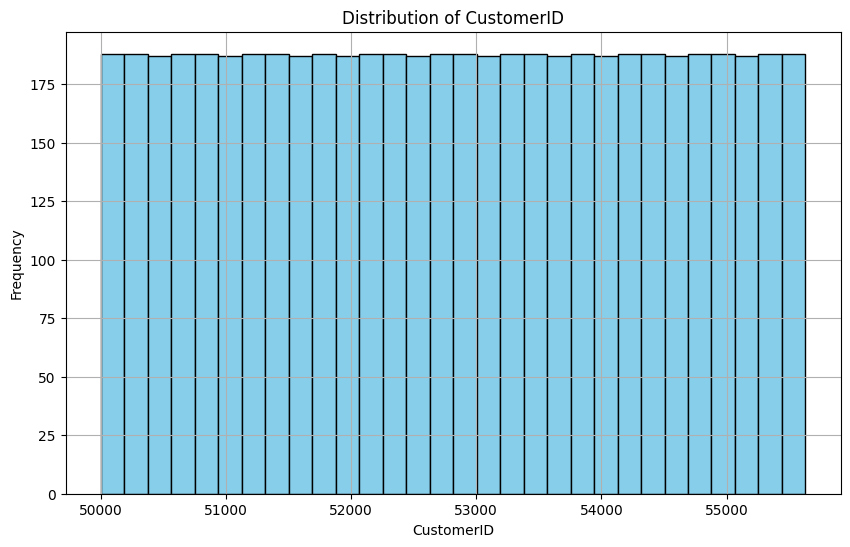

In [18]:

plt.figure(figsize=(10, 6))
plt.hist(df_original['CustomerID'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title('Distribution of CustomerID')
plt.grid(True)
plt.show()

In order to better comprehend the data, the first exploration comprised examining feature distribution, spotting any correlations with churn, and creating visualizations.

Important findings include  the following:

*  Tenure: There was a minor bias towards lower tenure values, but overall, the distribution of customer tenure was fairly even.

* Order Count: A lengthy range was seen in the number of orders, indicating an uncommonly active customer base.

* Satisfaction Score: Higher churn rates were typically observed among customers with lower satisfaction scores.

* Days Since Last Order: A higher chance of churn was related to a longer period of time since the last order.

* Preferred Payment Method: This seems to be a correlation between higher churn rates and specific payment methods, such as cash on delivery.

* City Tier: The churn behavior changed greatly between city tiers.

* For the coustmerId column there is no meaning of keeping it so we  will drop it

In [22]:
df_original

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0             160  
1                   0.0             121  
2                   3.0             120  
3                   3.0             134  
4                   3.0             130  
...                 ...             ...  
5625                4.0             151  
5626                NaN             225  
5627                4.0             

# Data pre-processing

sections in data pre-proccesing


*   cleaning
*   checking missing values

*   checking for duplication
*   checking outliers



**After this procceses we will visualize them using different plots
and try to procces the data with correct implentations
finally we will visual the proceces before and after  
to see what impact we did.**

***We use isnull().sum() to check for missing values in each column of the DataFrame. Missing values can impact the quality of our analysis and modeling, so it's crucial to identify and handle them appropriately.***

In [ ]:
missingvalues=df_original.isnull().sum()
missingvalues

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#total missing values
print(f'The number of missing values: {df_original.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df_original[df_original.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


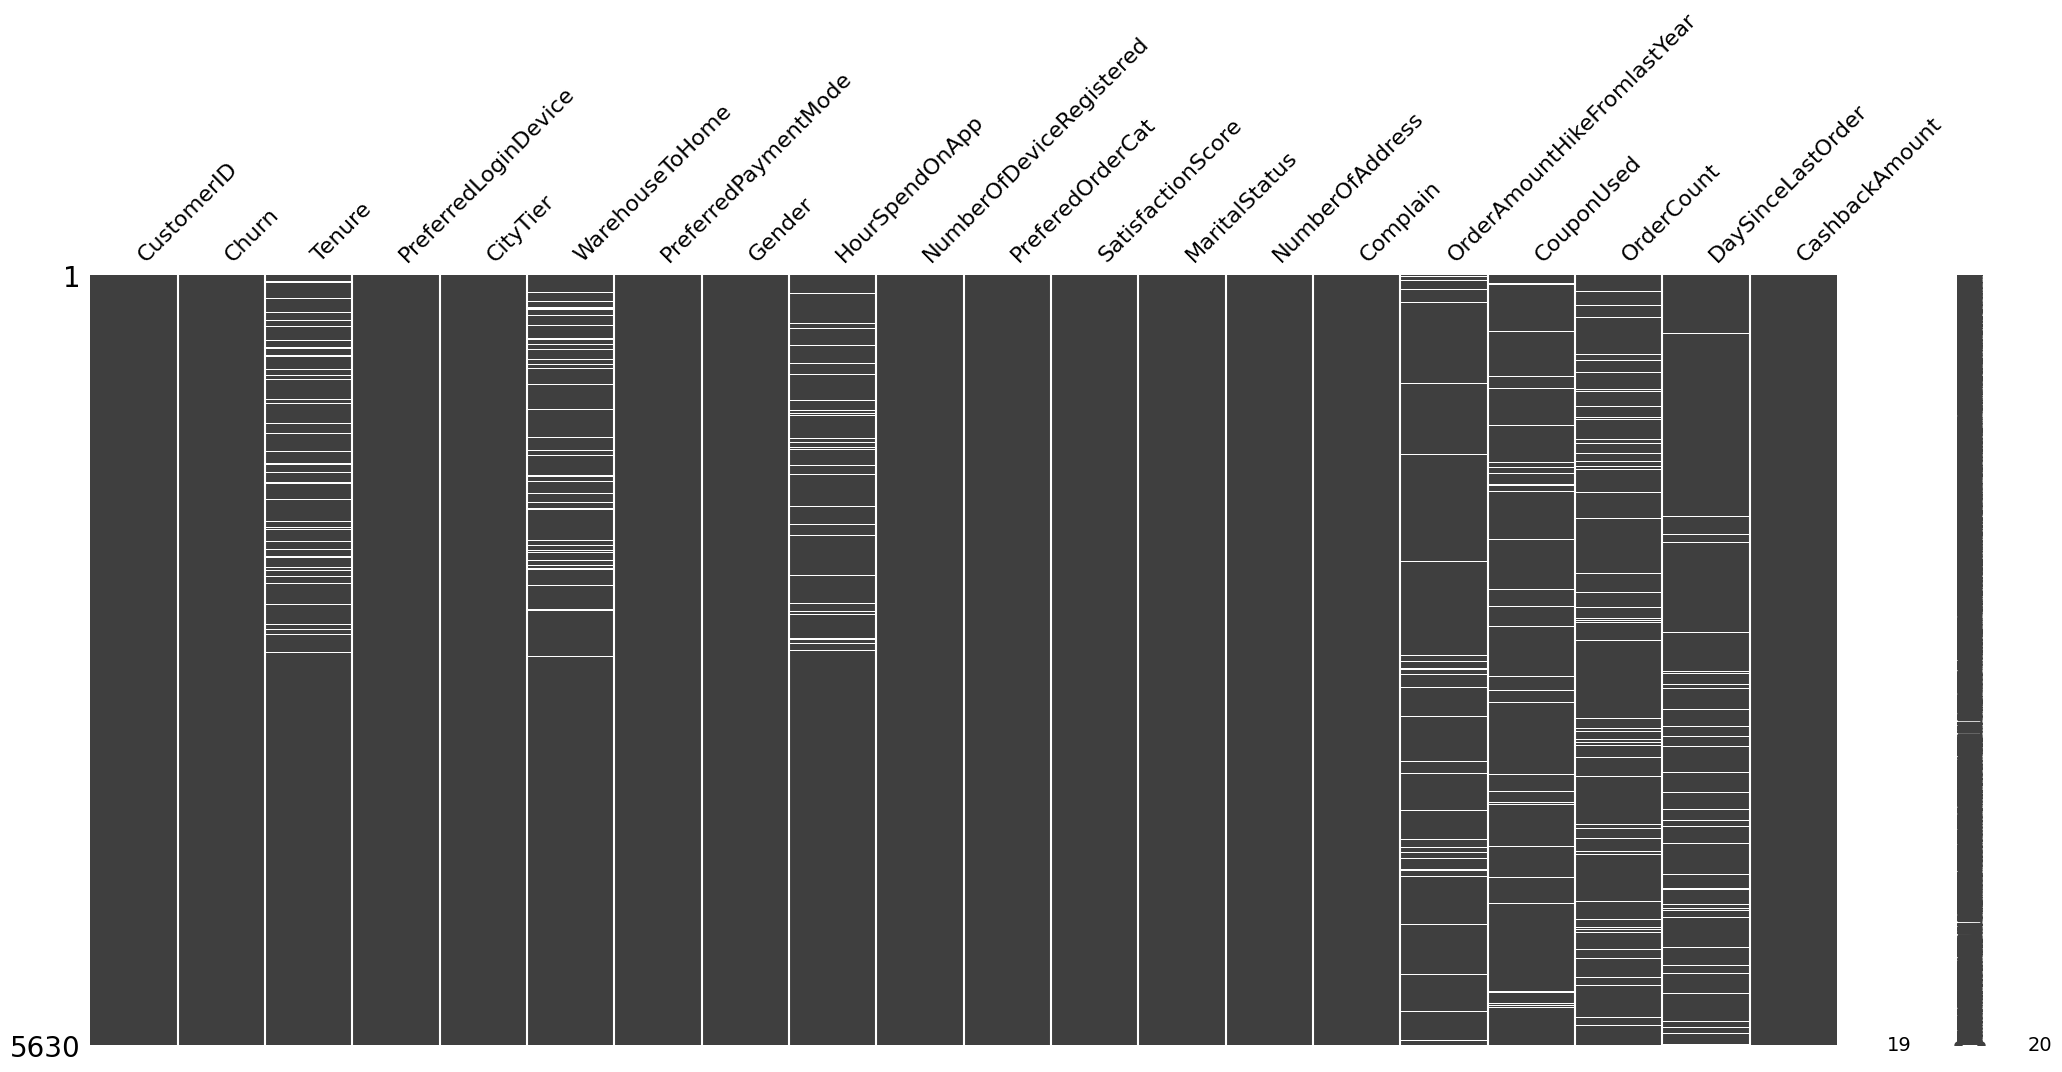

In [ ]:
msno.matrix(df_original)
plt.show()


Determine which columns have the largest percentage of missing data before imputation.

It might be necessary to pay extra attention to certain columns during imputation or analysis.

Keep an eye out for any missing value clusters or trends. This may show correlations between the absence of data in various columns.

Determine the total amount of missing data in the dataset. To comprehend the accuracy of the data and any potential biases, this information is important.


In [ ]:
duplicated=df_original.duplicated().sum()
duplicated

0

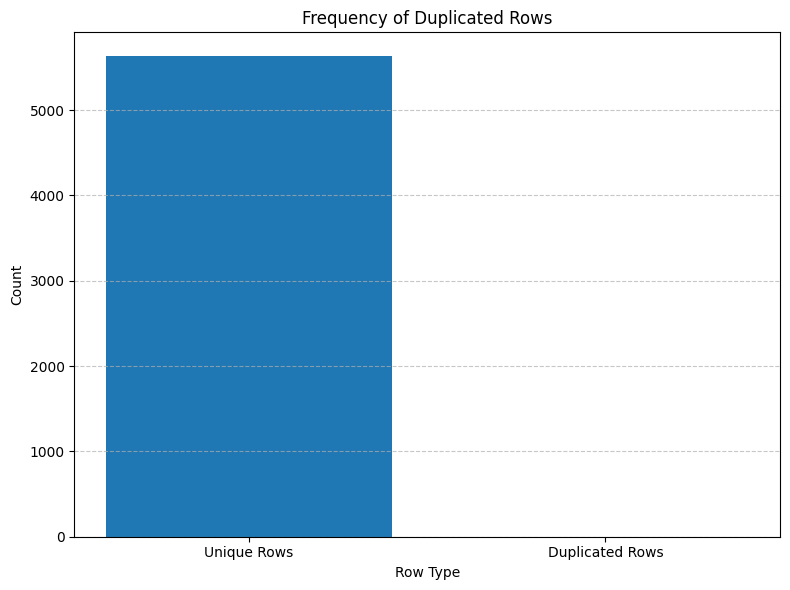

Number of duplicated rows: 0


In [16]:


# Assuming df_original is your DataFrame
# Check for duplicated rows
duplicated_rows = df_original.duplicated()

# Count the number of duplicated rows
num_duplicated_rows = duplicated_rows.sum()

# Visualize the frequency of duplicated rows
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicated Rows'], [len(df_original) - num_duplicated_rows, num_duplicated_rows])
plt.xlabel('Row Type')
plt.ylabel('Count')
plt.title('Frequency of Duplicated Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the number of duplicated rows
print("Number of duplicated rows:", num_duplicated_rows)


In [17]:
import pandas as pd

duplicated_cols = df_original.T.duplicated()

# Find the duplicated column names
duplicated_col_names = df_original.columns[duplicated_cols].tolist()

# Print the duplicated column names
print("Duplicated column names:", duplicated_col_names)


Duplicated column names: []


It is clearly showing that there is no duplication which is good for us to procced with the next step


In [ ]:
#imputation
numeric_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].median())

categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
df_original[categorical_columns] = df_original[categorical_columns].fillna(df_original[categorical_columns].mode().iloc[0])

print(df_original.isnull().sum())


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [ ]:
#another advanced way of impuation
from sklearn.impute import KNNImputer

# Initialize KNN imputer with k=5 (number of neighbors)
imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNN imputer for numeric columns
df_numeric = df_original.select_dtypes(include=['number'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df_original[df_numeric.columns] = df_imputed
imputer
df_imputed

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001.0    1.0     4.0       3.0              6.0             3.0   
1        50002.0    1.0     2.6       1.0              8.0             3.0   
2        50003.0    1.0     2.6       1.0             30.0             2.0   
3        50004.0    1.0     0.0       3.0             15.0             2.0   
4        50005.0    1.0     0.0       1.0             12.0             2.6   
...          ...    ...     ...       ...              ...             ...   
5625     55626.0    0.0    10.0       1.0             30.0             3.0   
5626     55627.0    0.0    13.0       1.0             13.0             3.0   
5627     55628.0    0.0     1.0       1.0             11.0             3.0   
5628     55629.0    0.0    23.0       3.0              9.0             4.0   
5629     55630.0    0.0     8.0       1.0             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3.0                2.0              9.0       1.0   
1                          4.0                3.0              7.0       1.0   
2                          4.0                3.0              6.0       1.0   
3                          4.0                5.0              8.0       0.0   
4                          3.0                5.0              3.0       0.0   
...                        ...                ...              ...       ...   
5625                       2.0                1.0              6.0       0.0   
5626                       5.0                5.0              6.0       0.0   
5627                       2.0                4.0              3.0       1.0   
5628                       5.0                4.0              4.0       0.0   
5629                       2.0                3.0              4.0       0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11.0         1.0         1.0                5.0   
1                            15.0         0.0         1.0                0.0   
2                            14.0         0.0         1.0                3.0   
3                            23.0         0.0         1.0                3.0   
4                            11.0         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                         18.0         1.0         2.0                4.0   
5626                         16.0         1.0         2.0                3.2   
5627                         21.0         1.0         2.0                4.0   
5628                         15.0         2.0         2.0                9.0   
5629                         13.0         2.0         2.0                3.0   

      CashbackAmount  
0              160.0  
1              121.0  
2              120.0  
3              134.0  
4              130.0  
...              ...  
5625           151.0  
5626           225.0  
5627           186.0  
5628           179.0  
5629           169.0  

[5630 rows x 15 columns]

#  why imputation not to just delete them?


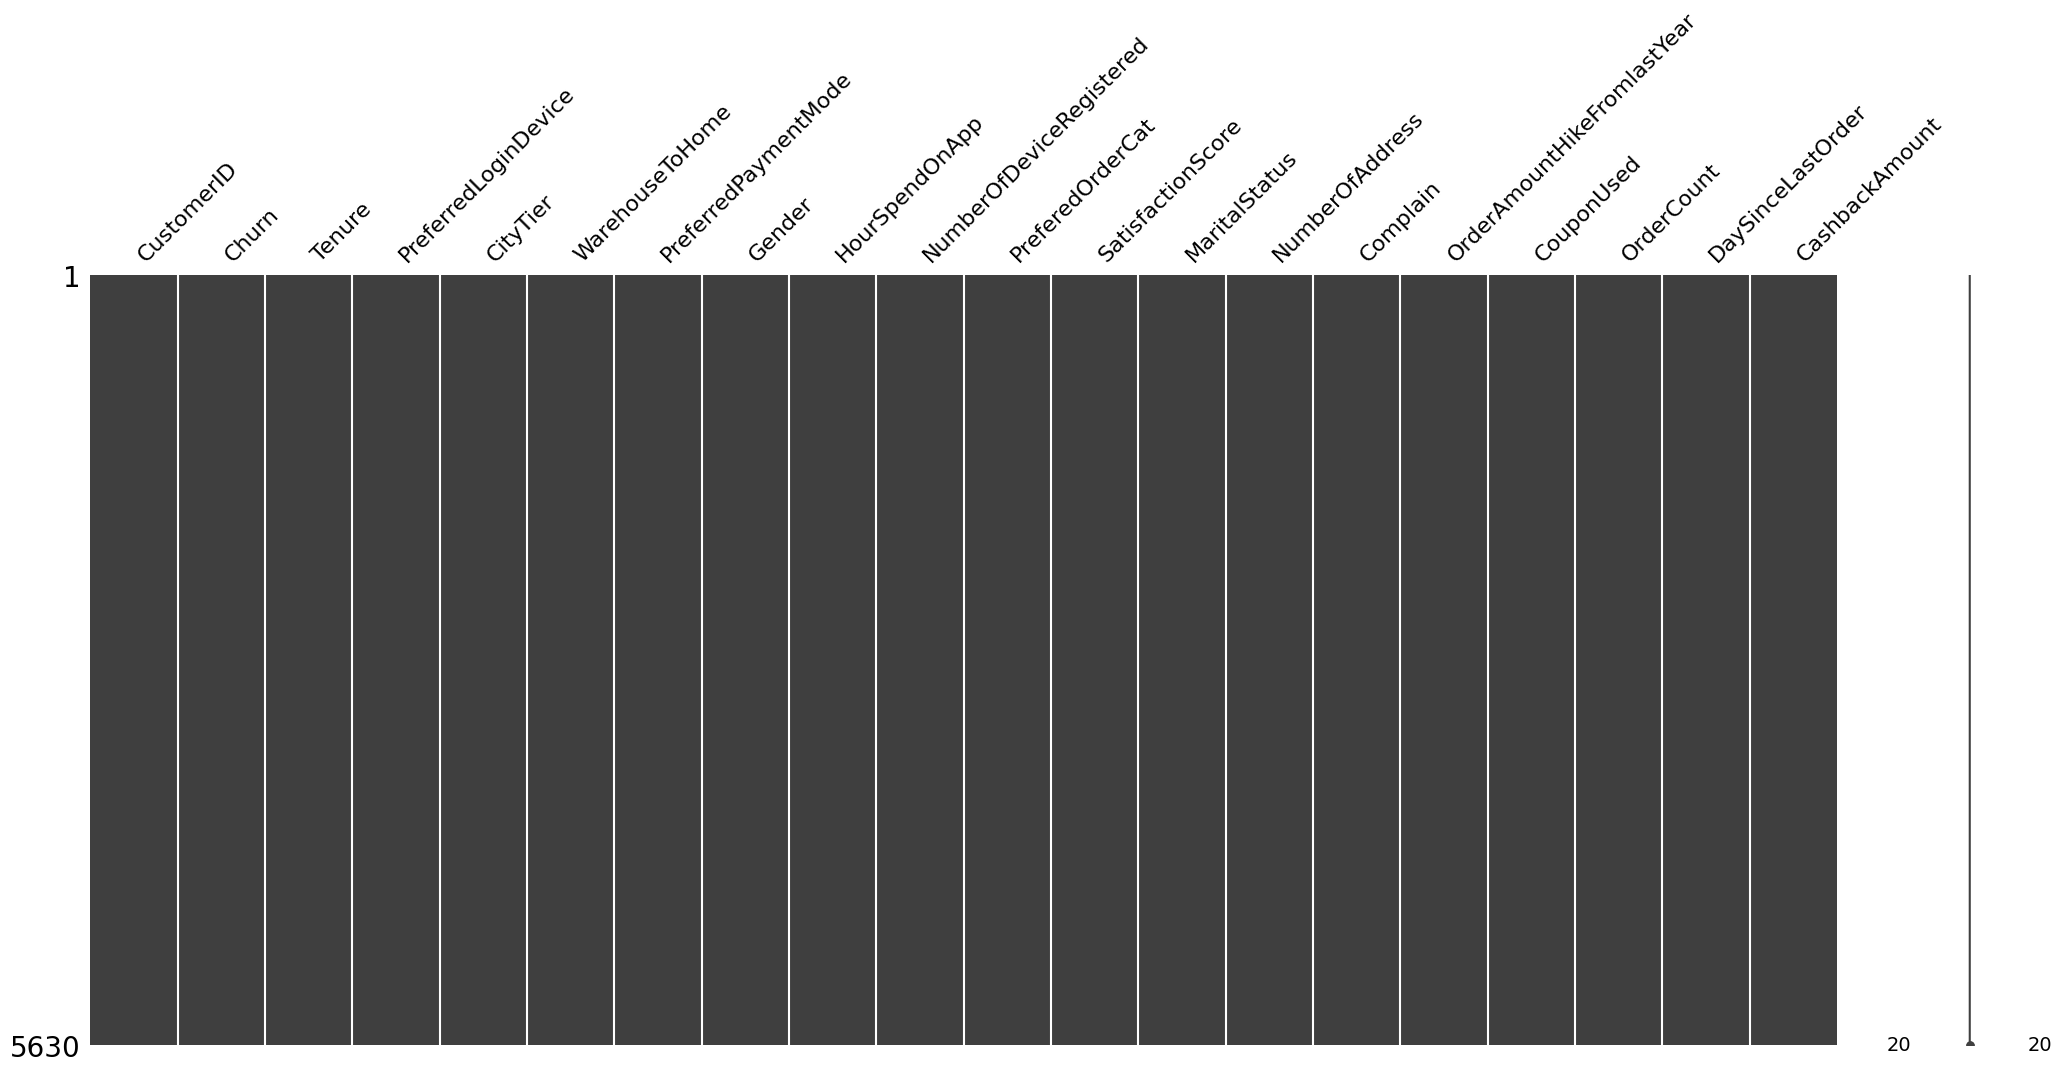

In [ ]:
msno.matrix(df_original)
plt.show()


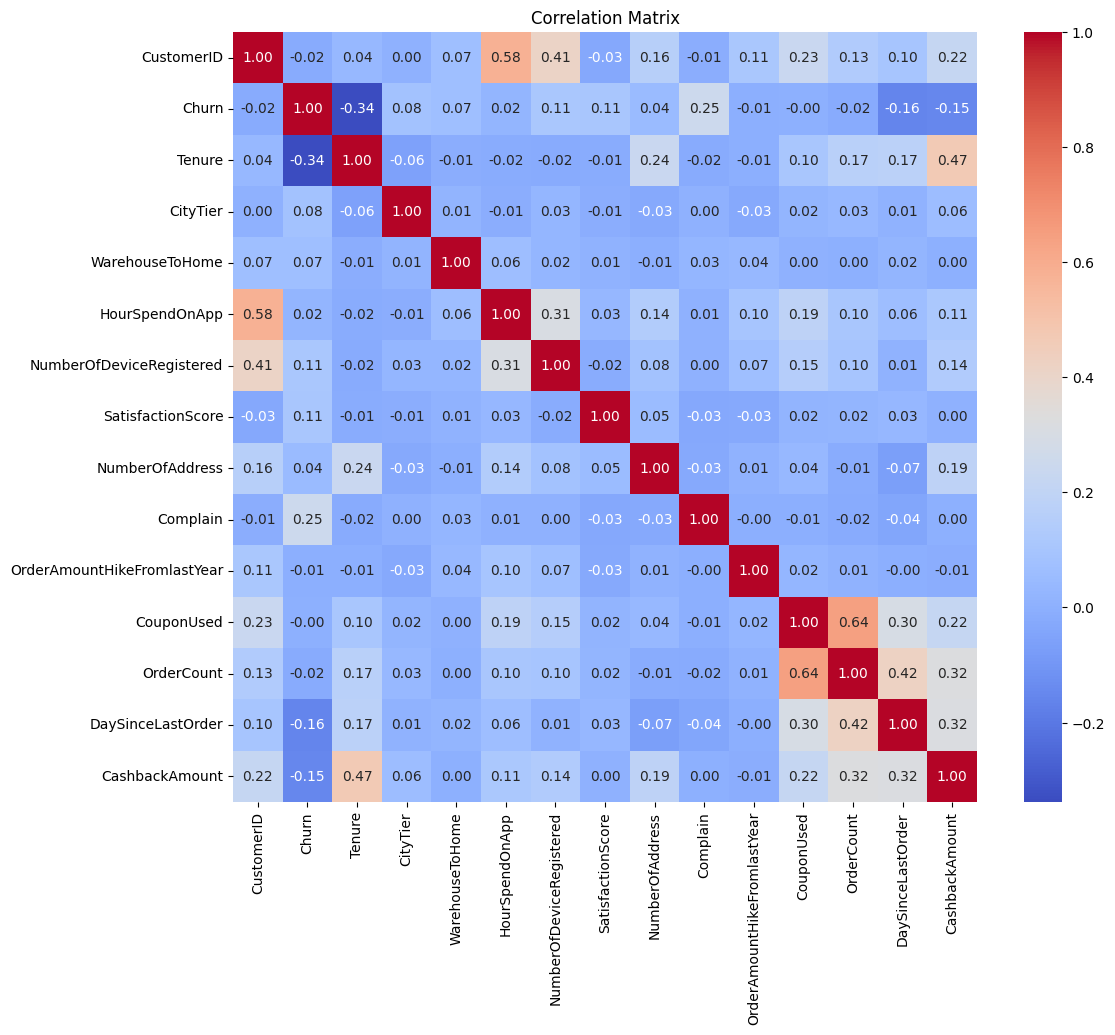

In [ ]:
# Correlation matrix
corr_matrix = df_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Convert categorical columns to numerical using one-hot encoding
# Identify categorical columns
categorical_cols = df_original.select_dtypes(include=['object']).columns

categorical_cols

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [31]:
# One-hot encode categorical columns
 encod=pd.get_dummies(df_original, columns=categorical_cols, drop_first=True)


IndentationError: unexpected indent (<ipython-input-31-b67ca4568a40>, line 2)

EDA

In [ ]:
# Summary statistics for numeric columns
numeric_summary = df_original.describe()
print(numeric_summary)


         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.566785   
std     1625.385339     0.374240     8.357951     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.934636                  3.688988           3.066785   
std          0.705528                  1.023999           1.380194   
min     

In [ ]:

print(df_original['PreferredLoginDevice'].value_counts())
print(df_original['PreferredPaymentMode'].value_counts())
print(df_original['Gender'].value_counts())
print(df_original['PreferedOrderCat'].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


In [ ]:
df_original.loc[df_original['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df_original.loc[df_original['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df_original.loc[df_original['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df_original.loc[df_original['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

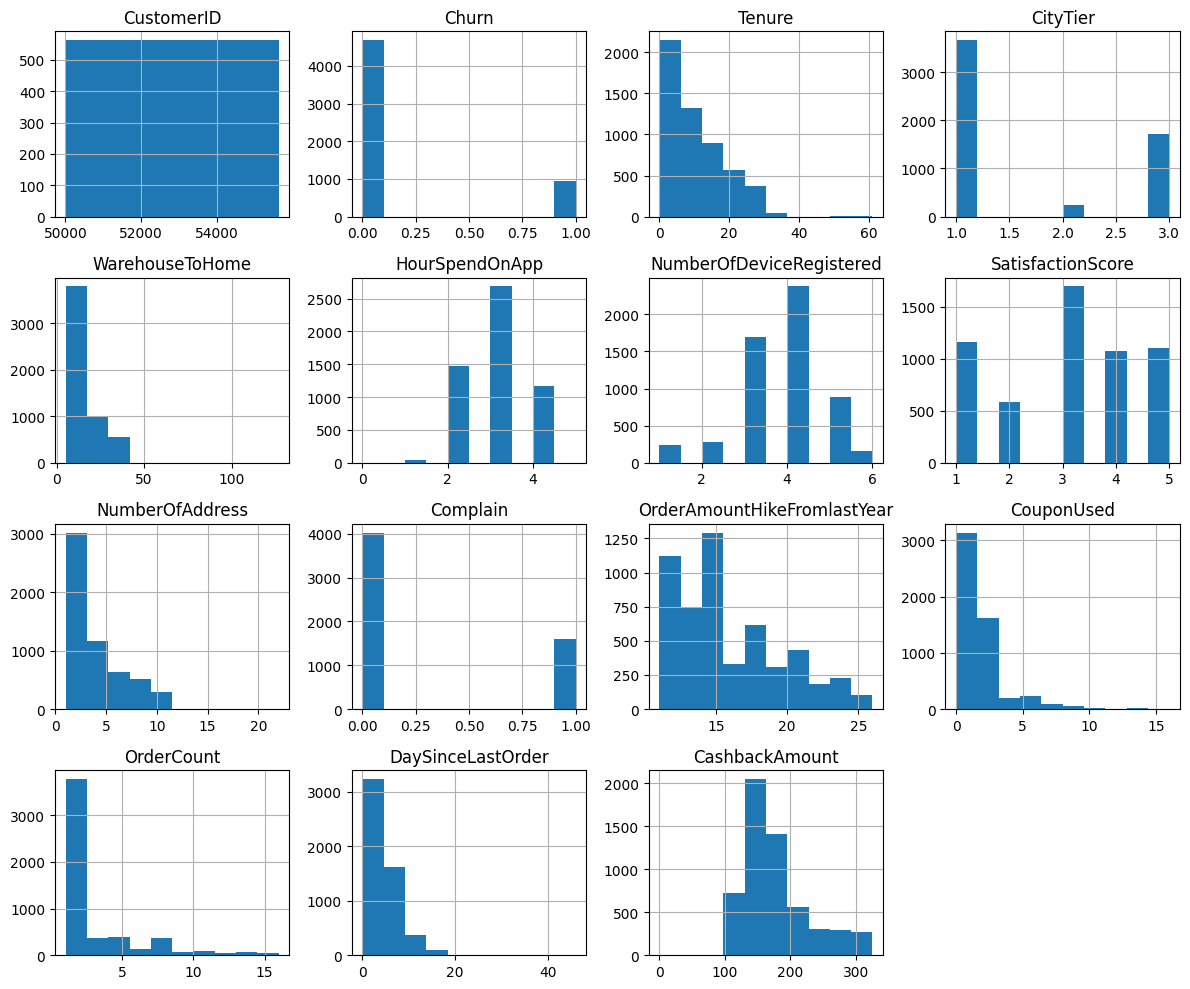

In [ ]:
# Histograms for numeric features
df_original.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



In [ ]:
# Drop the CustomerID column
df_original.drop('CustomerID', axis=1, inplace=True)


In [ ]:
df_original

In [ ]:
# Analyze churn rate by 'CityTier'
df_original.groupby('CityTier')['Churn'].mean()

CityTier
1.0    0.145117
2.0    0.198347
3.0    0.213705
Name: Churn, dtype: float64

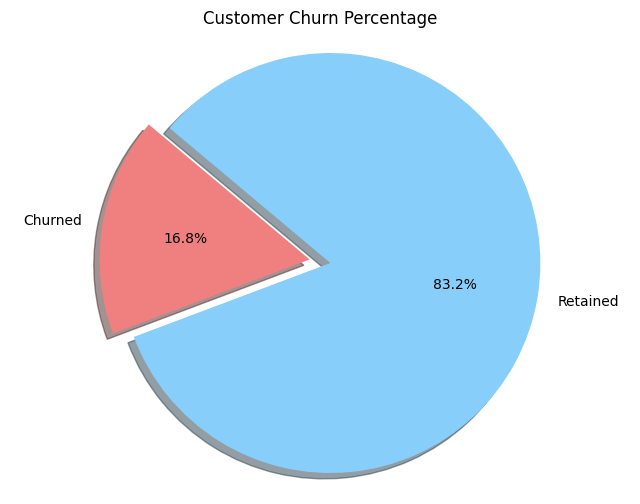

In [ ]:

# Calculate the number of churned customers
churn_count = df_original['Churn'].sum()

# Calculate the total number of customers
total_customers = df_original.shape[0]

# Calculate the percentage of customer churn
churn_percentage = (churn_count / total_customers) * 100

# Create a pie chart
labels = ['Churned', 'Retained']
sizes = [churn_percentage, 100 - churn_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Churned)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Churn Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


The outcome of our data set is Churn, and there are no missing values in “churn” column. However,
the outcomes variables are imbalanced due to the high number of retained customers in comparison
to churned customers as shown in the plot below.

Text(0, 0.5, 'Count')

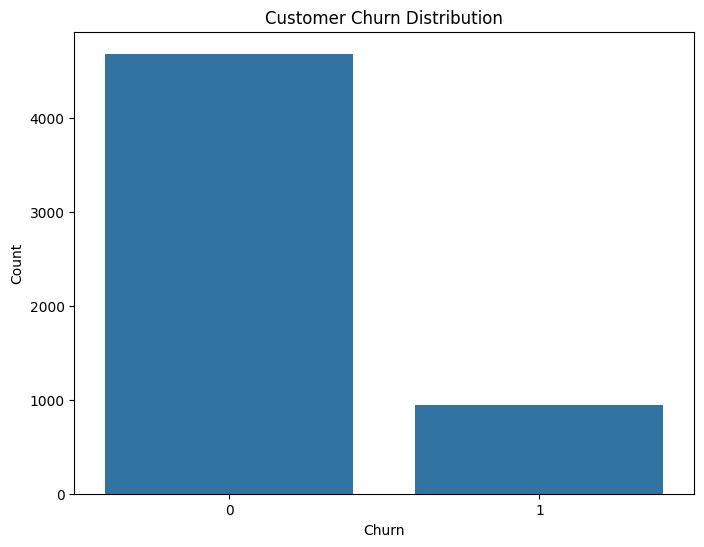

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Churn')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

Distributions

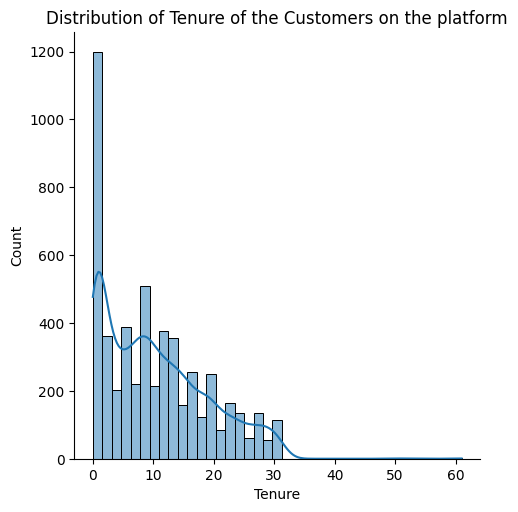

In [ ]:
sns.displot(x='Tenure', kde=True, data=df_original)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

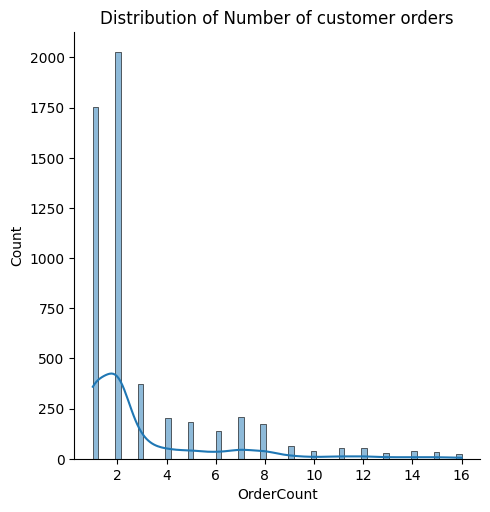

In [ ]:
sns.displot(x='OrderCount', kde=True, data=df_original)
plt.title("Distribution of Number of customer orders")
plt.show()

In [ ]:
# Create a Plotly box plot
fig = px.box(df_original, x='Churn', y='Tenure', color='Churn', labels={'x': 'Churn', 'y': 'Tenure'},
             title='Relationship between Tenure and Churn (Box Plot)')

fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['Not Churned', 'Churned']})
fig.show()


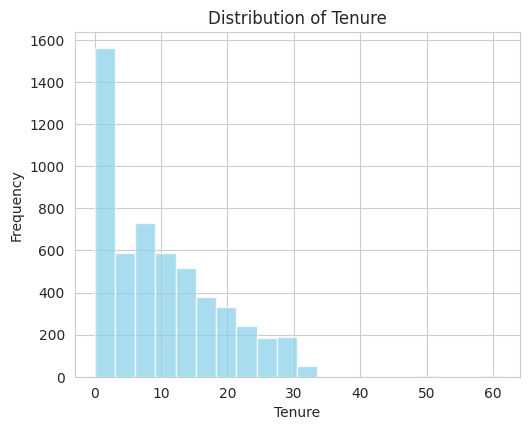

In [ ]:
# Histograms for numeric features
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(df_original['Tenure'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')



plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of HourSpendOnApp')

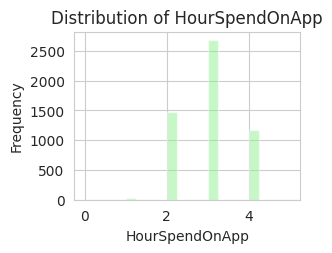

In [ ]:

plt.subplot(2, 2, 2)
plt.hist(df_original['HourSpendOnApp'], bins=20, color='lightgreen', alpha=0.5)
plt.xlabel('HourSpendOnApp')
plt.ylabel('Frequency')
plt.title('Distribution of HourSpendOnApp')

In [ ]:

plt.subplot(2, 2, 3)
plt.hist(df_original['OrderAmountHikeFromlastYear'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('OrderAmountHikeFromlastYear')
plt.ylabel('Frequency')
plt.title('Distribution of OrderAmountHikeFromlastYear')


Text(0.5, 1.0, 'Distribution of CouponUsed')

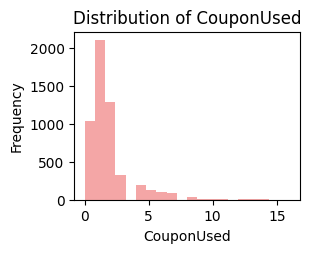

In [ ]:
plt.subplot(2, 2, 4)
plt.hist(df_original['CouponUsed'], bins=20, color='lightcoral', alpha=0.7)
plt.xlabel('CouponUsed')
plt.ylabel('Frequency')
plt.title('Distribution of CouponUsed')

In [ ]:


# Create a bar plot for a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferredLoginDevice', hue='PreferredLoginDevice', palette='Set2', legend=False)
plt.title('Distribution of Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferredPaymentMode', hue='PreferredPaymentMode', palette='Set2', legend=False)
plt.title('Distribution of Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


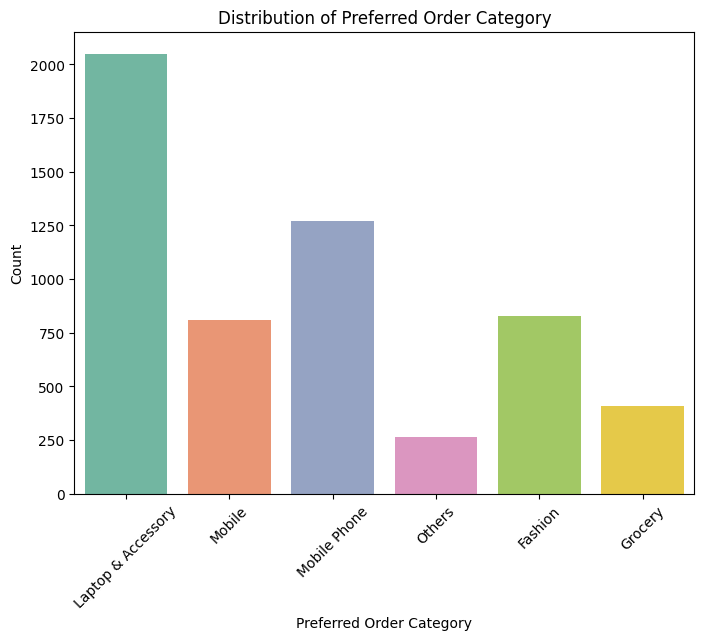

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferedOrderCat', hue='PreferedOrderCat', palette='Set2', legend=False)
plt.title('Distribution of Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


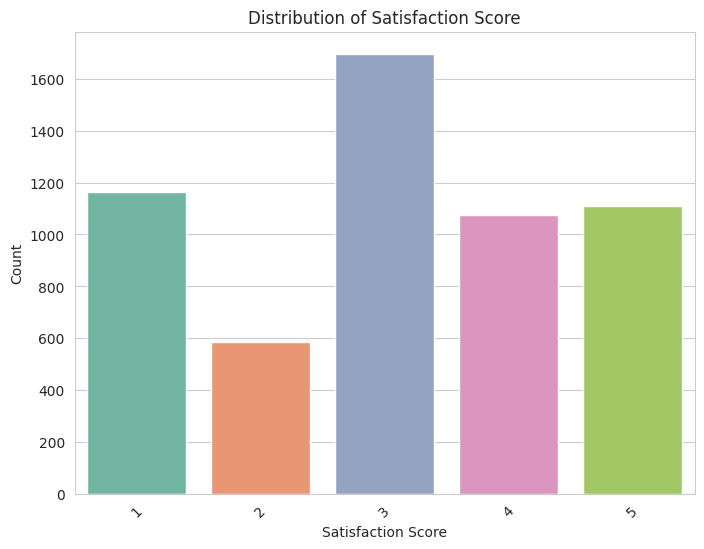

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='SatisfactionScore', hue='SatisfactionScore', palette='Set2', legend=False)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-91-08510fbf0bda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x='MaritalStatus', palette='Set2')


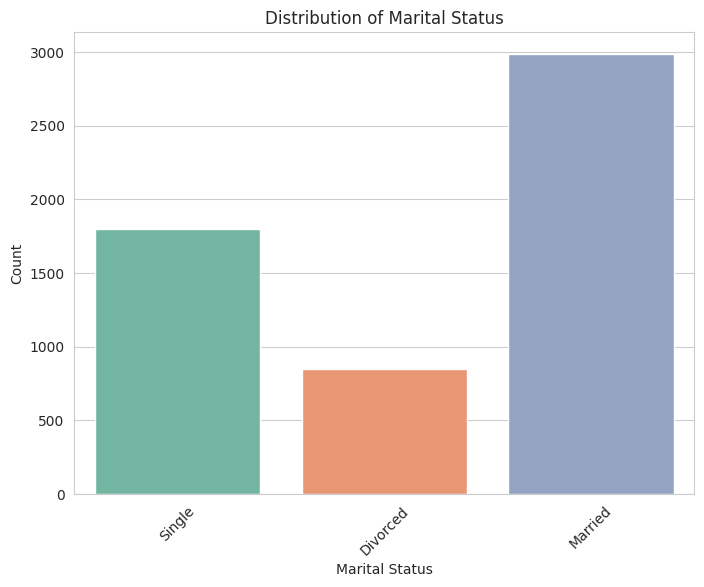

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='MaritalStatus', palette='Set2')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


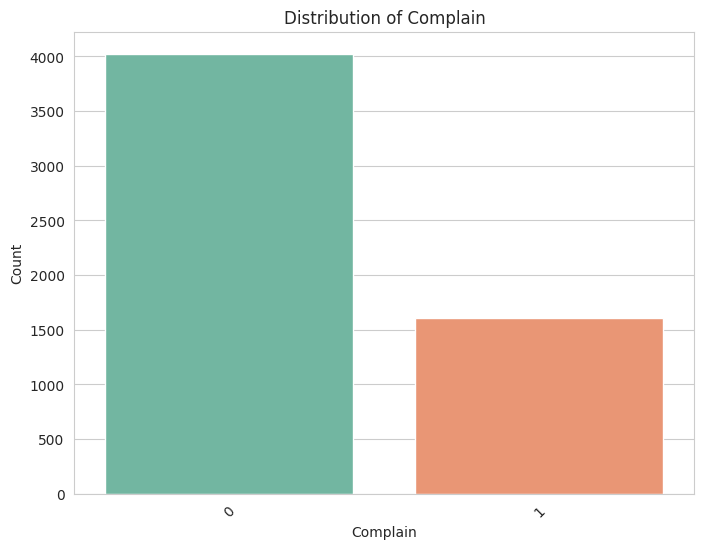

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Complain', hue='Complain', palette='Set2', legend=False)
plt.title('Distribution of Complain')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


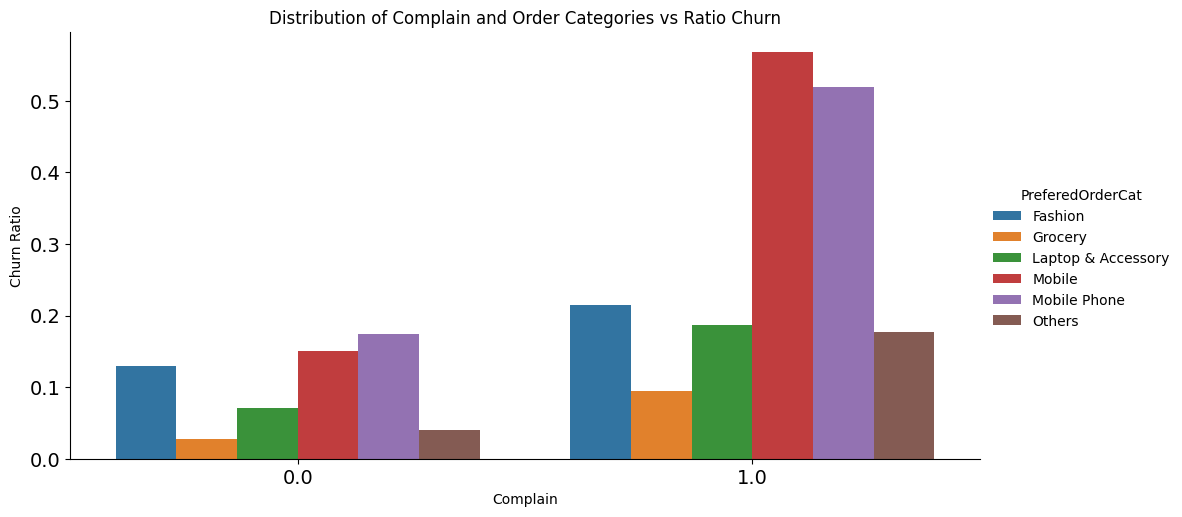

In [ ]:

# Group by Complain and PreferedOrderCat, calculate churn ratio
grouping_complainorder = df_original.groupby(['Complain', 'PreferedOrderCat'])['Churn'].mean().reset_index()

# Plot using seaborn
sns.catplot(x="Complain", y="Churn", data=grouping_complainorder, hue='PreferedOrderCat',
            kind='bar', height=5, aspect=2)

# Set axis labels and title
plt.xlabel('Complain')
plt.ylabel('Churn Ratio')
plt.title('Distribution of Complain and Order Categories vs Ratio Churn')

# Set tick label size
plt.tick_params(axis='both', which='major', labelsize=14)


plt.show()


Customers with complaints
have a ratio churn increase in
all order categories.

how many hours spend on ecommerce app


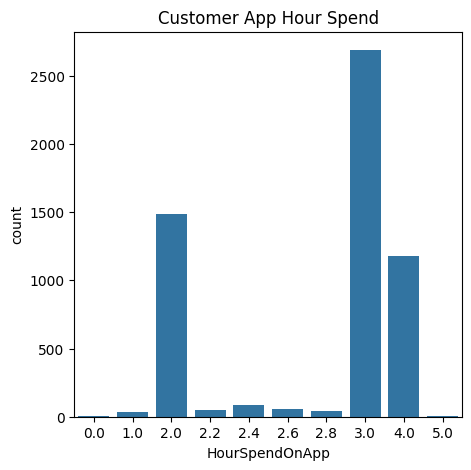

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_original['HourSpendOnApp'])
plt.title('Customer App Hour Spend')
plt.show()

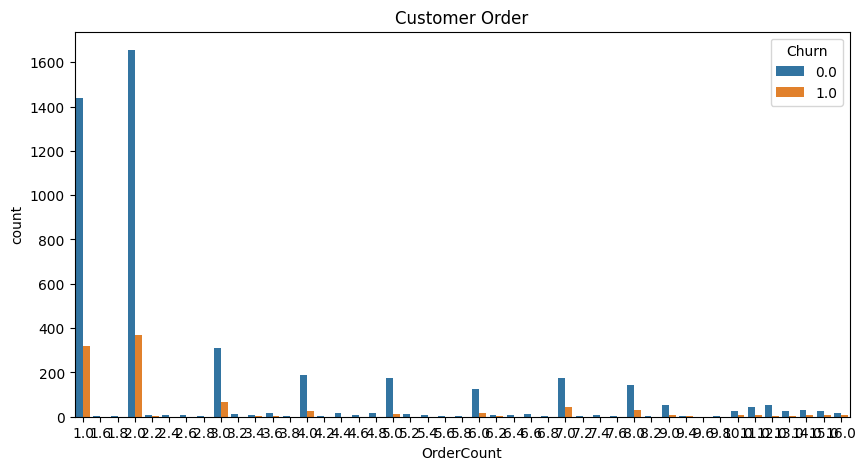

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_original['OrderCount'], hue=df_original['Churn'])
plt.title('Customer Order')
plt.show()

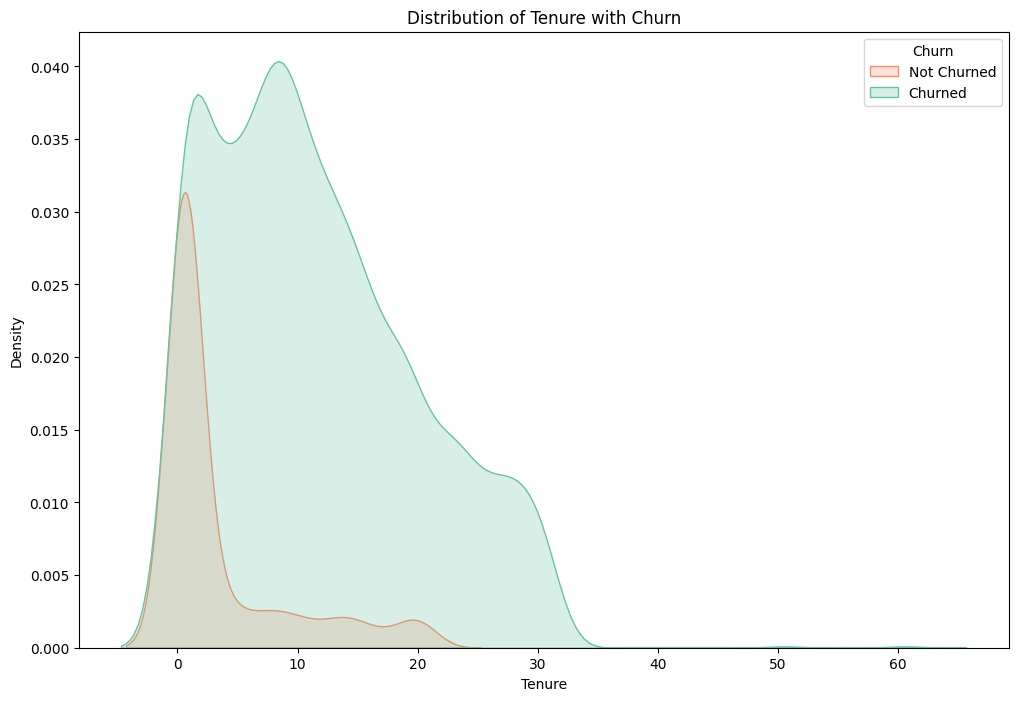

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.kdeplot(data=df_original, x='Tenure', hue='Churn', fill=True, palette='Set2')
plt.title('Distribution of Tenure with Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


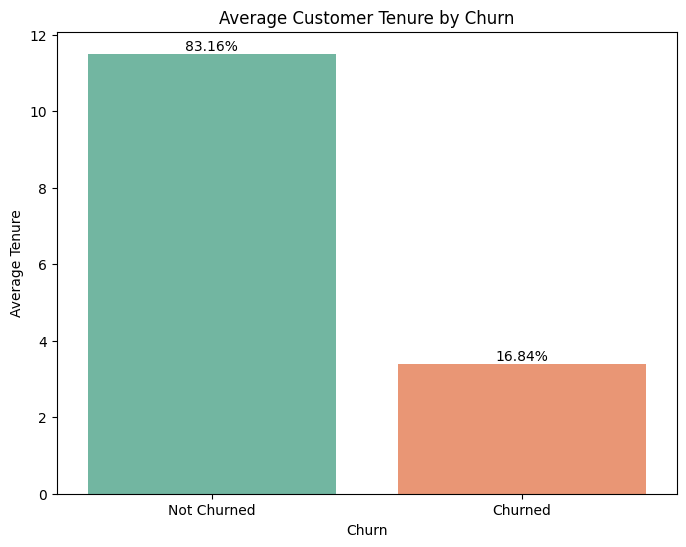

In [ ]:

# Calculate churn percentages
churn_percentages = df_original['Churn'].value_counts(normalize=True) * 100

# Calculate average tenure for each churn category
average_tenure_by_churn = df_original.groupby('Churn')['Tenure'].mean().reset_index()

# Create a bar plot based on average tenure by churn
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=average_tenure_by_churn, x='Churn', y='Tenure', hue='Churn', palette='Set2', legend=False)
plt.title('Average Customer Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.xticks([0, 1], ['Not Churned', 'Churned'])  # Customizing x-axis tick labels

# Annotate bars with churn percentages
for index, row in churn_percentages.items():
    plt.text(index, average_tenure_by_churn.loc[index]['Tenure'] + 0.1, f'{row:.2f}%', ha='center')

plt.show()


hithdljflidjfali
jfdudfljadf
had

In [ ]:
import plotly.graph_objects as go

churn_counts = df_original['Churn'].value_counts()
labels = churn_counts.index.tolist()
values = churn_counts.values.tolist()

fig = go.Figure(data=[go.Bar(x=labels, y=values)])
fig.update_layout(title=' Bar Chart of Churn Counts')
fig.show()


EXtra

In [ ]:
# Calculate quartiles and IQR for 'Tenure' column
Q1 = df_original['Tenure'].quantile(0.25)
Q3 = df_original['Tenure'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = df_original[(df_original['Tenure'] < (Q1 - 1.5 * IQR)) | (df_original['Tenure'] > (Q3 + 1.5 * IQR))]

# Print the outliers
print("Outliers detected using IQR method:")
print(outliers_iqr[['Tenure']])


Outliers detected using IQR method:
      Tenure
928     50.0
2719    60.0
3743    51.0
5534    61.0


Mounted at /content/drive


In [ ]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

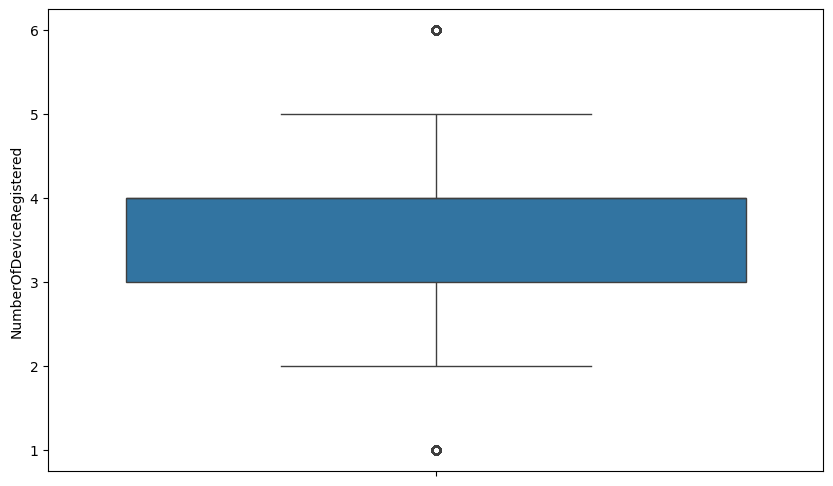

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_original['NumberOfDeviceRegistered'])
plt.xticks(rotation=12)  # Rotate x-axis labels for better visibility
plt.show()

# Feature enginneering



---

*  Encoding Categorical Variables

*  Feature scaling  

          Scaling ensures that features with different scales or units have a comparable impact on the model.

*  Splitting the Data

       After preprocessing, the dataset is split into training and testing sets to evaluate the model's performance on unseen data.

        80 : 20
        Train : Test





encoding

In [ ]:
cat_data = df_original.select_dtypes(include='object')
cat_data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [ ]:
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([df_original.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)
data_enc

<Axes: >

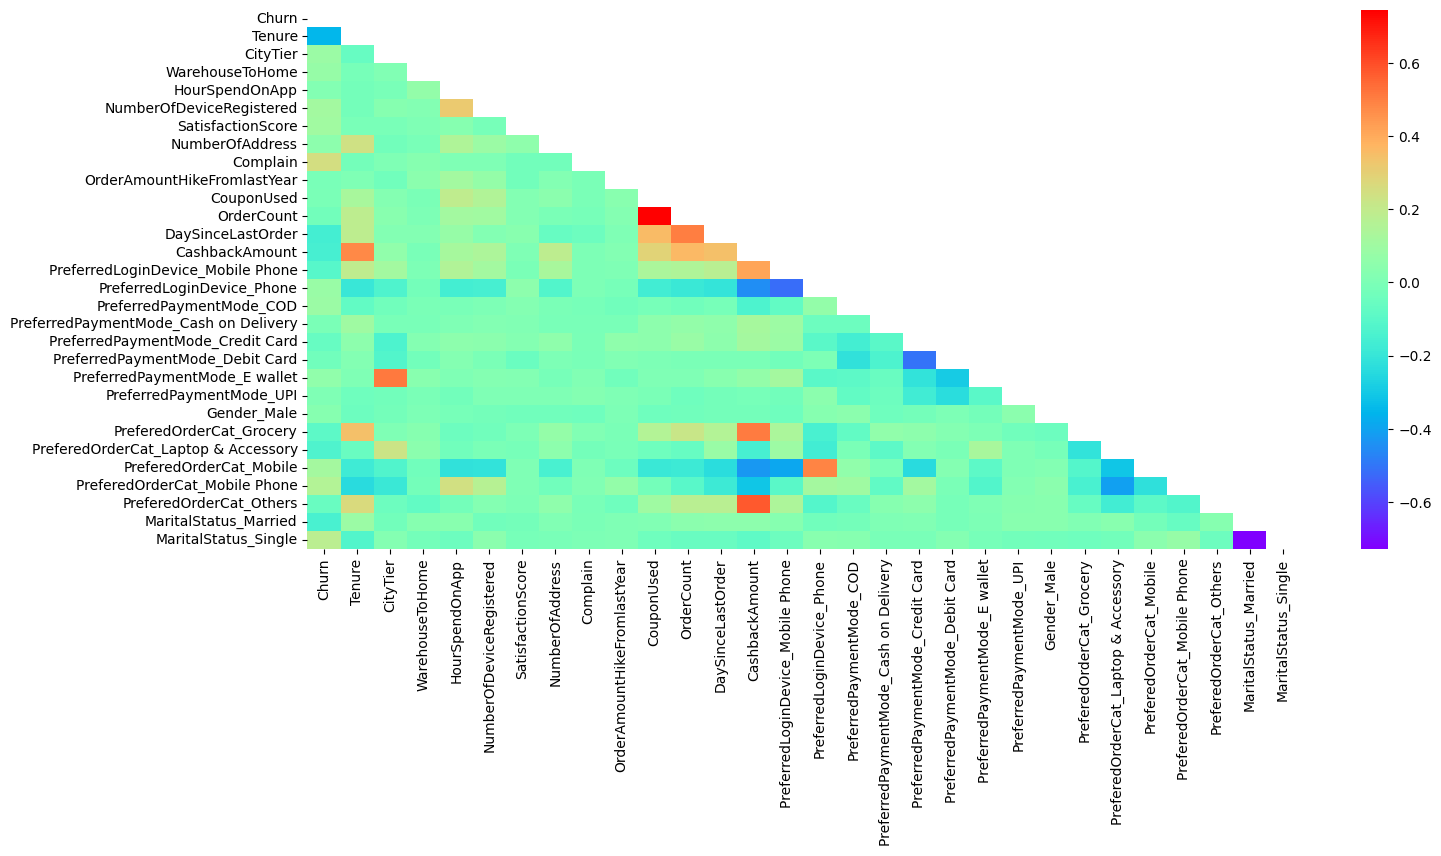

In [ ]:
mask=np.zeros_like(data_enc.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(data_enc.corr(method='pearson'), mask=mask, cmap='rainbow')

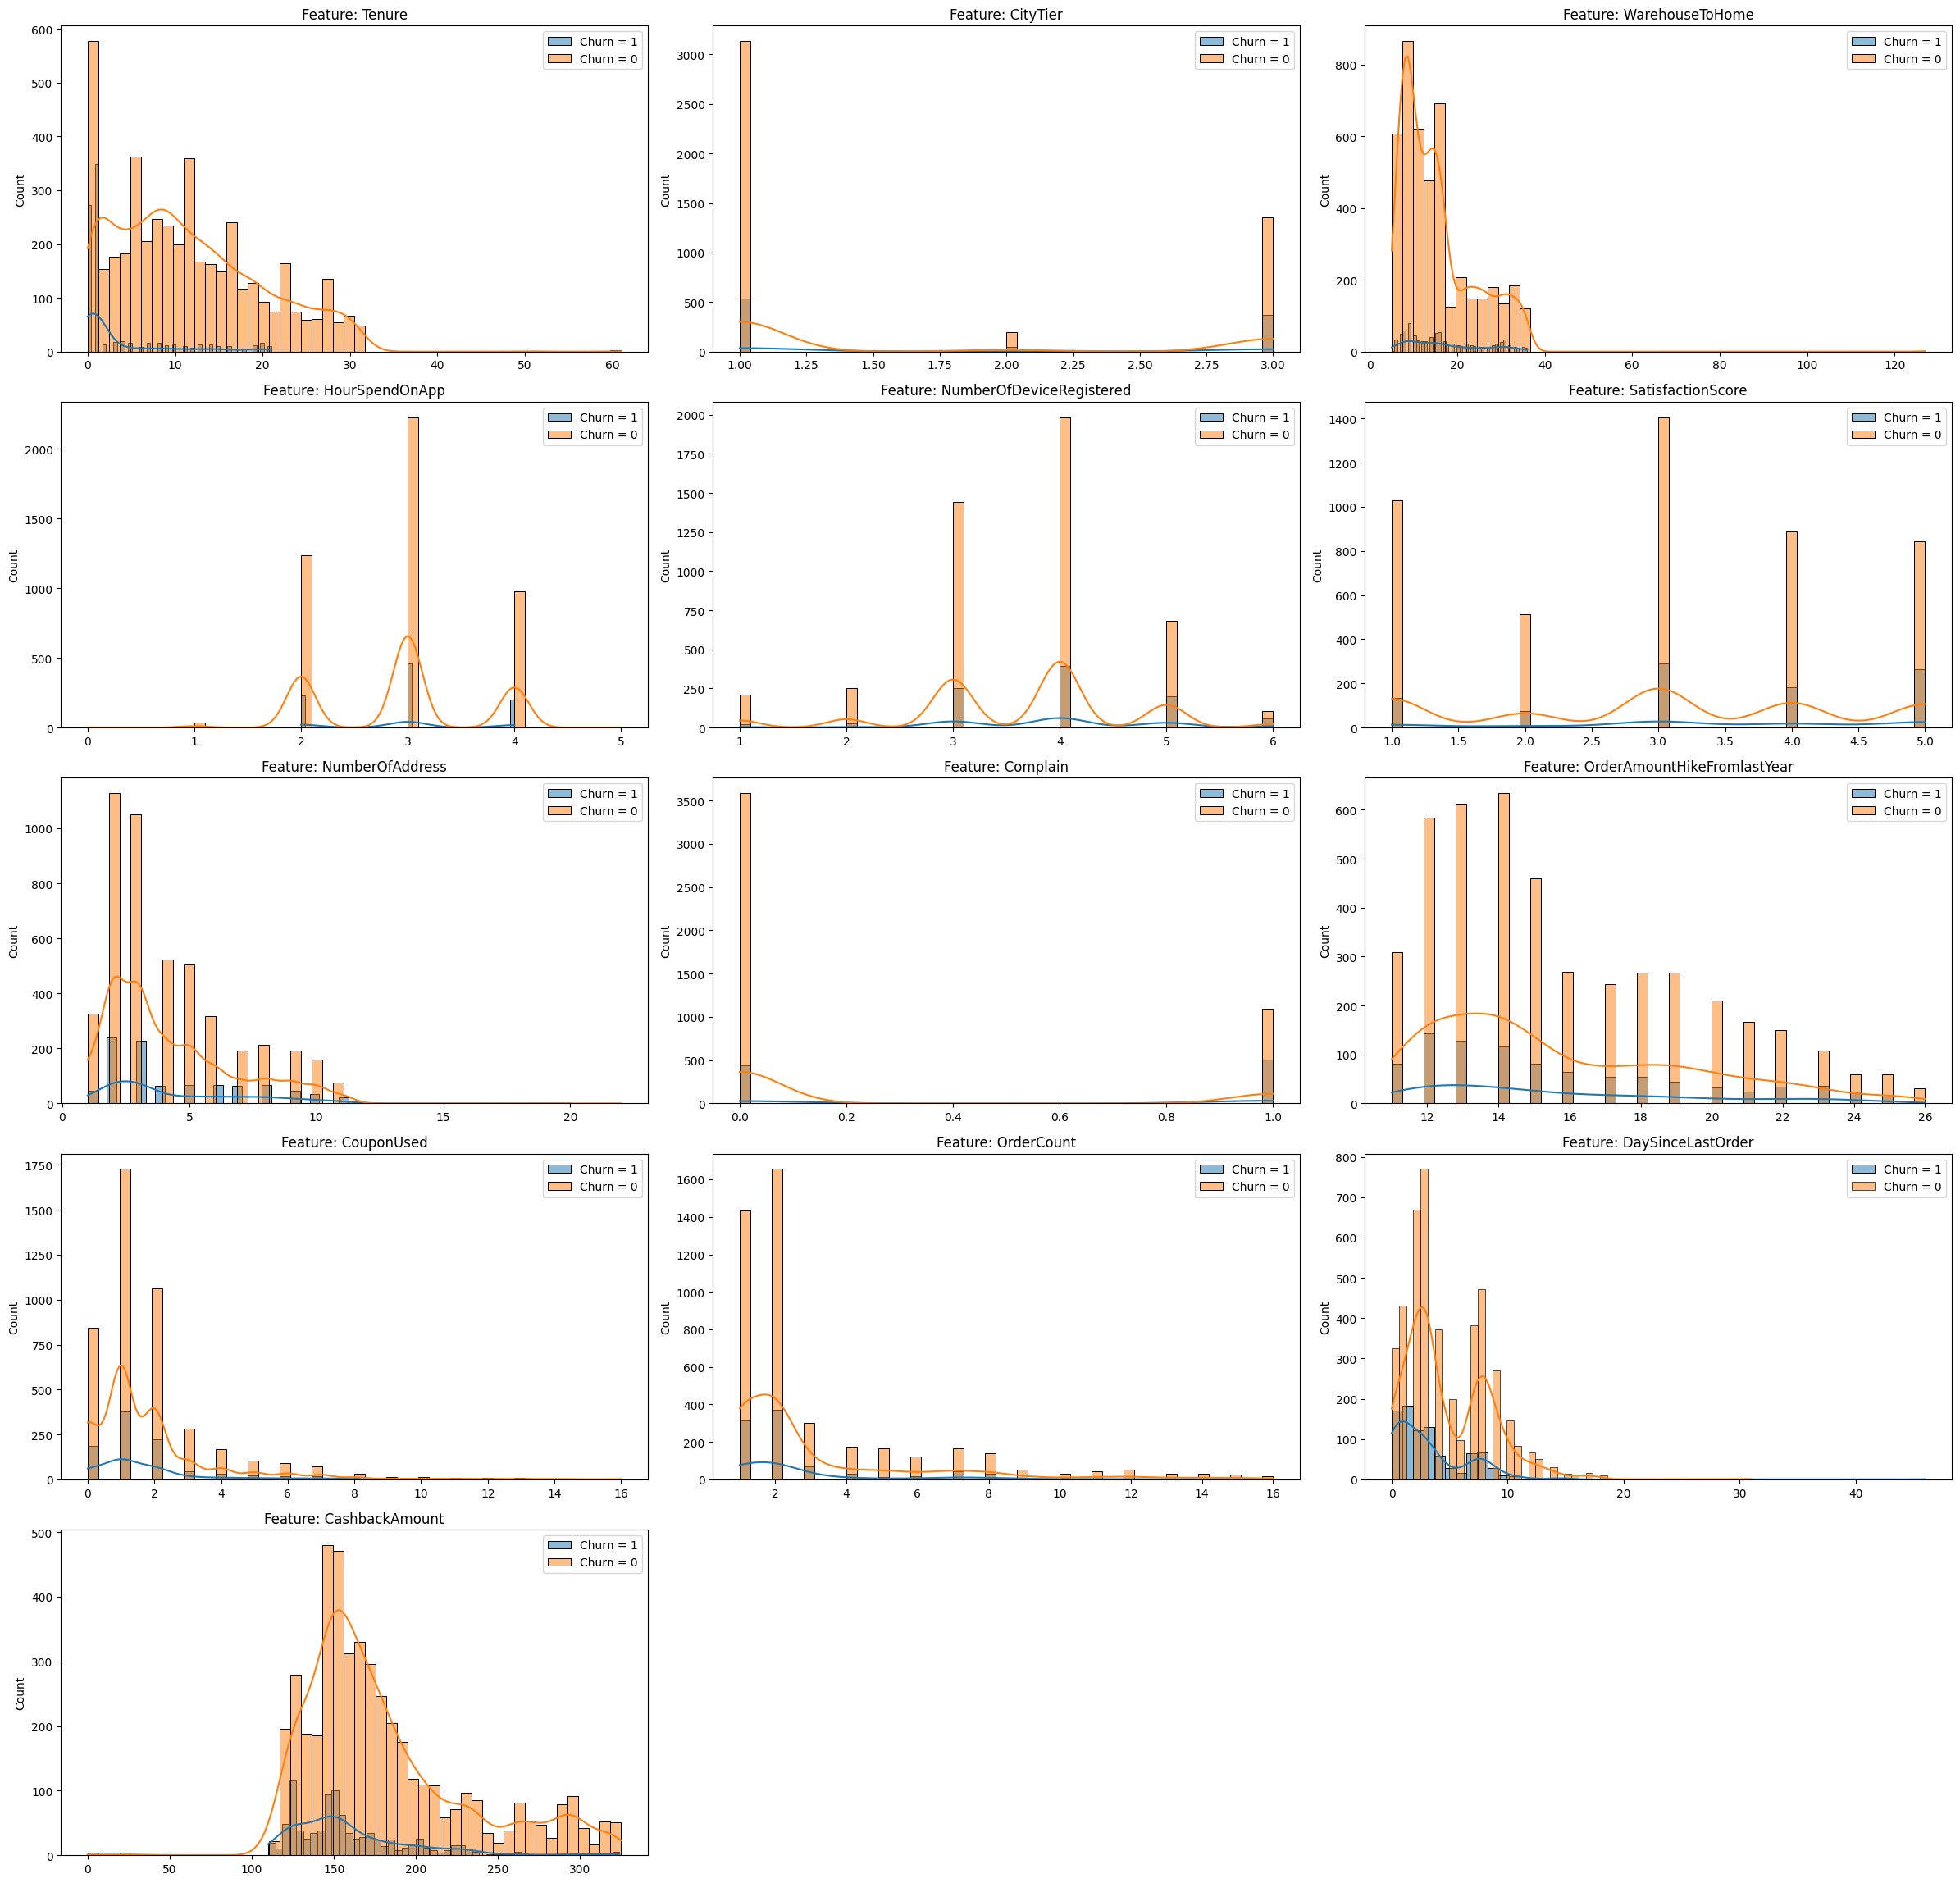

In [ ]:


# Columns to include in the plot
included_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create a figure and gridspec
plt.figure(figsize=(24, 32))
gs = gridspec.GridSpec(7, 3)

# Loop through included columns and create subplots
for i, cn in enumerate(included_columns):
    ax = plt.subplot(gs[i])
    sns.histplot(df_original[df_original['Churn'] == 1][cn], bins=50, label='Churn = 1', kde=True)
    sns.histplot(df_original[df_original['Churn'] == 0][cn], bins=50, label='Churn = 0', kde=True)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
    ax.legend()

plt.tight_layout()
plt.show()


**It can be assumed from the graph above that the data from the numerical features is not normally distributed as seen from the graph and there are many outliers. Because the data is not normally distributed, the correlation test will use the Spearman correlation test method.**

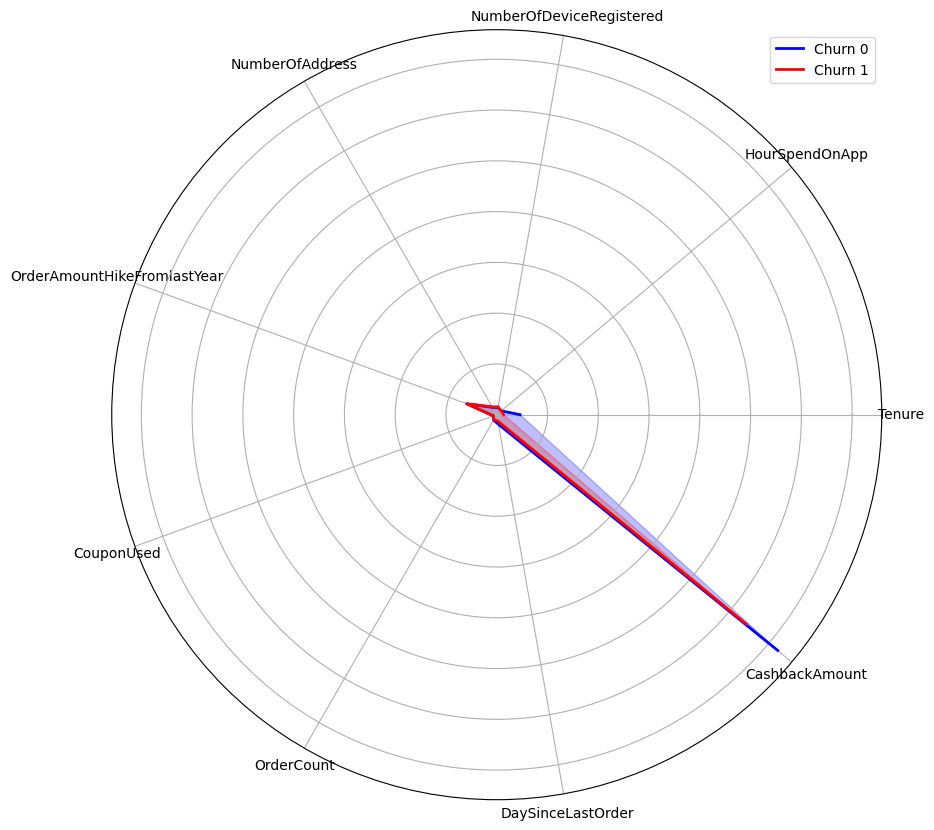

In [ ]:
import numpy as np
#keep
# Select numeric columns for radar chart
radar_columns = ['Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Calculate the mean values for each group (Churn 0 and Churn 1)
mean_churn_0 = df_original[df_original['Churn'] == 0][radar_columns].mean().values
mean_churn_1 = df_original[df_original['Churn'] == 1][radar_columns].mean().values

# Create radar chart
labels = radar_columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.fill(angles, mean_churn_0, color='blue', alpha=0.25)
ax.plot(angles, mean_churn_0, color='blue', linewidth=2, label='Churn 0')

ax.fill(angles, mean_churn_1, color='red', alpha=0.25)
ax.plot(angles, mean_churn_1, color='red', linewidth=2, label='Churn 1')

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)

ax.legend()
plt.show()


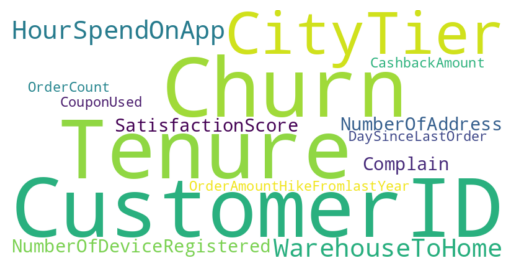

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df_original[:])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


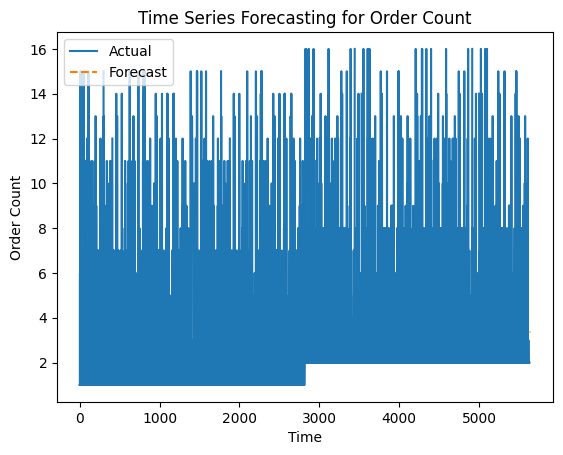

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_original['OrderCount'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
plt.plot(df_original['OrderCount'], label='Actual')
plt.plot(range(len(df_original), len(df_original) + len(forecast)), forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Order Count')
plt.legend()
plt.title('Time Series Forecasting for Order Count')
plt.show()


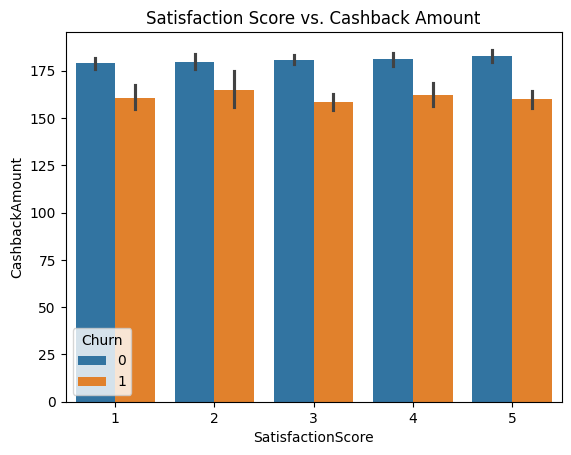

In [ ]:
sns.barplot(x='SatisfactionScore', y='CashbackAmount', hue='Churn', data=df_original)
plt.title('Satisfaction Score vs. Cashback Amount')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_original, x='HourSpendOnApp', y='OrderCount', z='OrderAmountHikeFromlastYear', color='Churn')
fig.update_layout(title='3D Scatter Plot of Customer Engagement')
fig.show()


In [ ]:
pie_data = df_original['SatisfactionScore'].value_counts()
fig = px.pie(pie_data, values=pie_data.values, names=pie_data.index)
fig.update_layout(title=' Pie Chart of Satisfaction Scores')
fig.show()


In [ ]:
fig = px.scatter_matrix(df_original, dimensions=['HourSpendOnApp', 'OrderCount', 'NumberOfDeviceRegistered', 'SatisfactionScore'], color='Churn')
fig.update_layout(title=' Scatter Matrix of Customer Engagement Features by Churn')
fig.show()


In [ ]:
fig = px.sunburst(df_original, path=['SatisfactionScore', 'NumberOfDeviceRegistered', 'Churn'], values='OrderCount', color='OrderAmountHikeFromlastYear')
fig.update_layout(title='Interactive Sunburst Chart of Customer Engagement by Satisfaction, Devices, and Churn')
fig.show()


In [ ]:
fig = px.parallel_coordinates(df_original, color='Churn', dimensions=['HourSpendOnApp', 'NumberOfDeviceRegistered', 'OrderCount', 'CashbackAmount', 'OrderAmountHikeFromlastYear', 'SatisfactionScore'])
fig.update_layout(title='Interactive Parallel Coordinates Plot of Customer Engagement and Churn')
fig.show()


<Axes: xlabel='DaySinceLastOrder', ylabel='Tenure'>

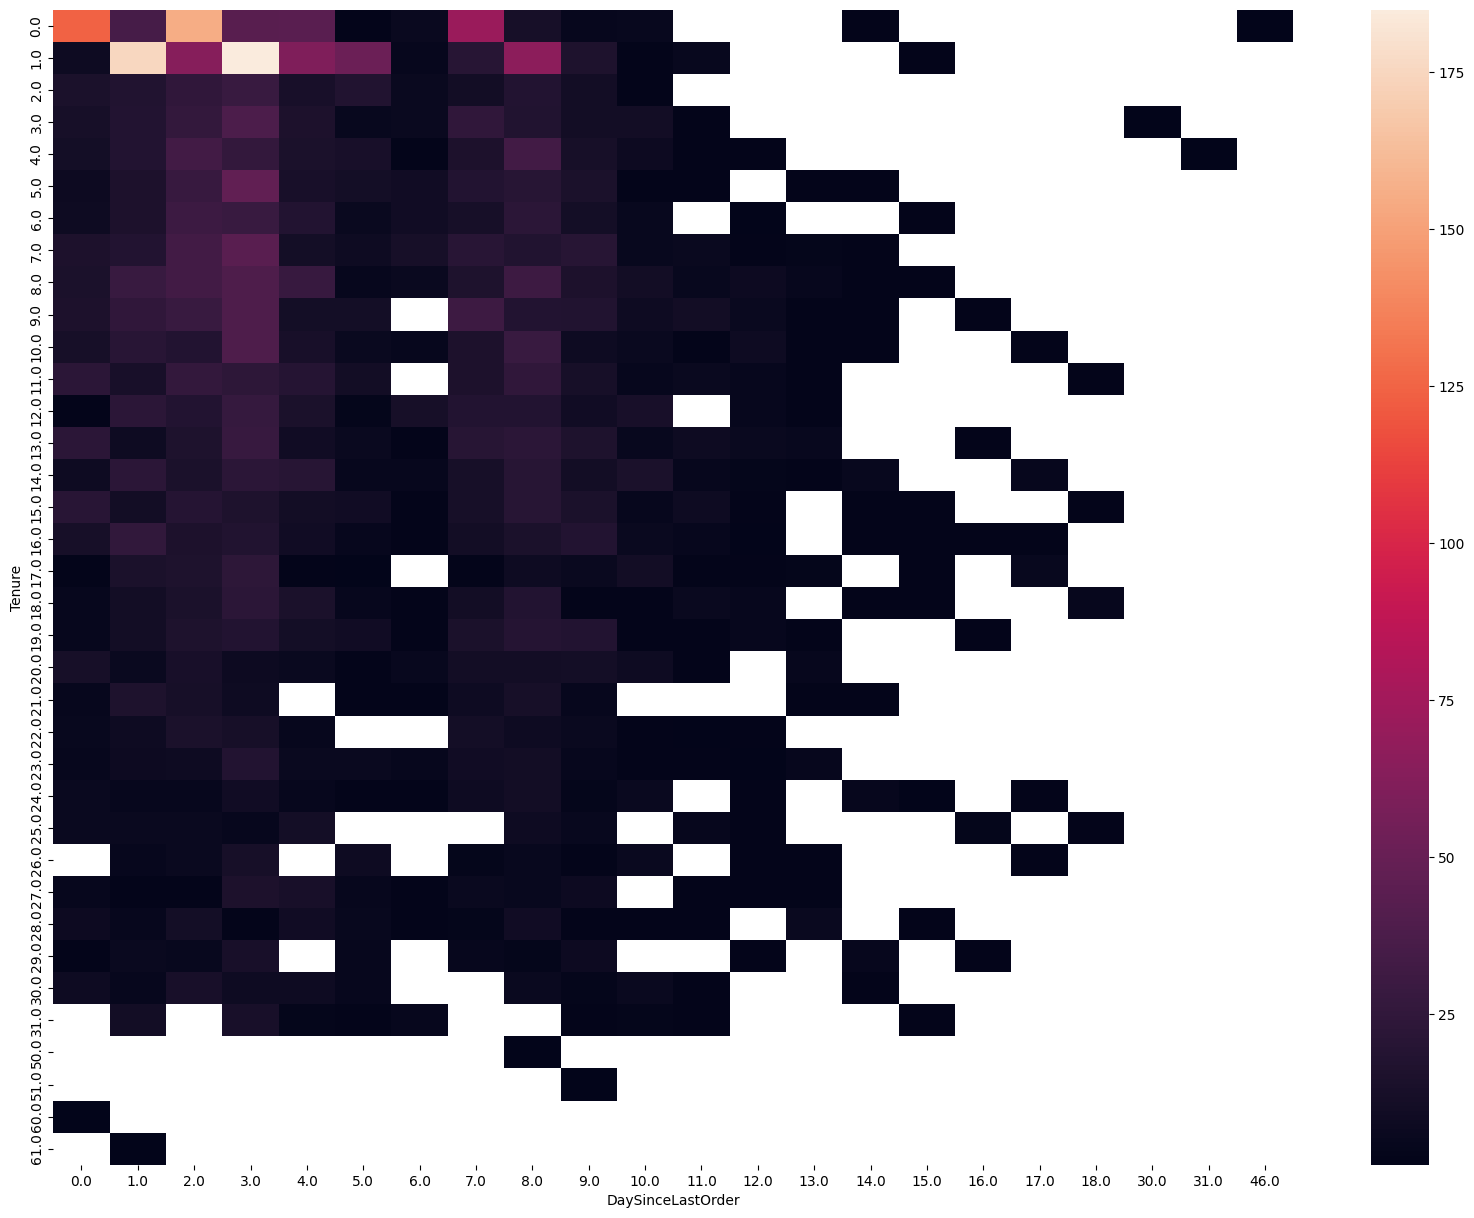

In [ ]:
cohort_pivot = pd.pivot_table(df_original,
                              index='Tenure',
                              columns='DaySinceLastOrder',
                              values='CustomerID',
                              aggfunc=pd.Series.nunique)
plt.figure(figsize=(20,15))
sns.heatmap(cohort_pivot)

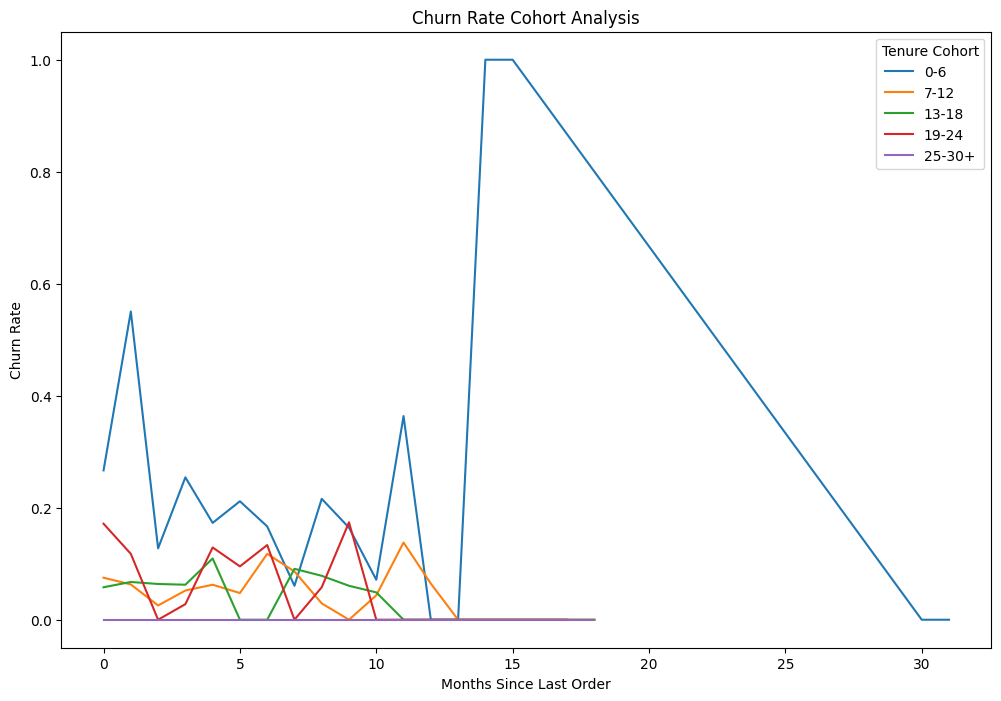

In [ ]:
# Calculate churn rate for each cohort over time
churn_rate_cohort = df_original.groupby(['TenureCohort', 'DaySinceLastOrder']).Churn.mean().reset_index()

# Pivot the data for plotting
churn_rate_cohort_pivot = churn_rate_cohort.pivot_table(index='TenureCohort', columns='DaySinceLastOrder', values='Churn')

# Plot the churn rate cohort line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=churn_rate_cohort_pivot.T, dashes=False)
plt.title('Churn Rate Cohort Analysis')
plt.xlabel('Months Since Last Order')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure Cohort', loc='upper right')
plt.show()


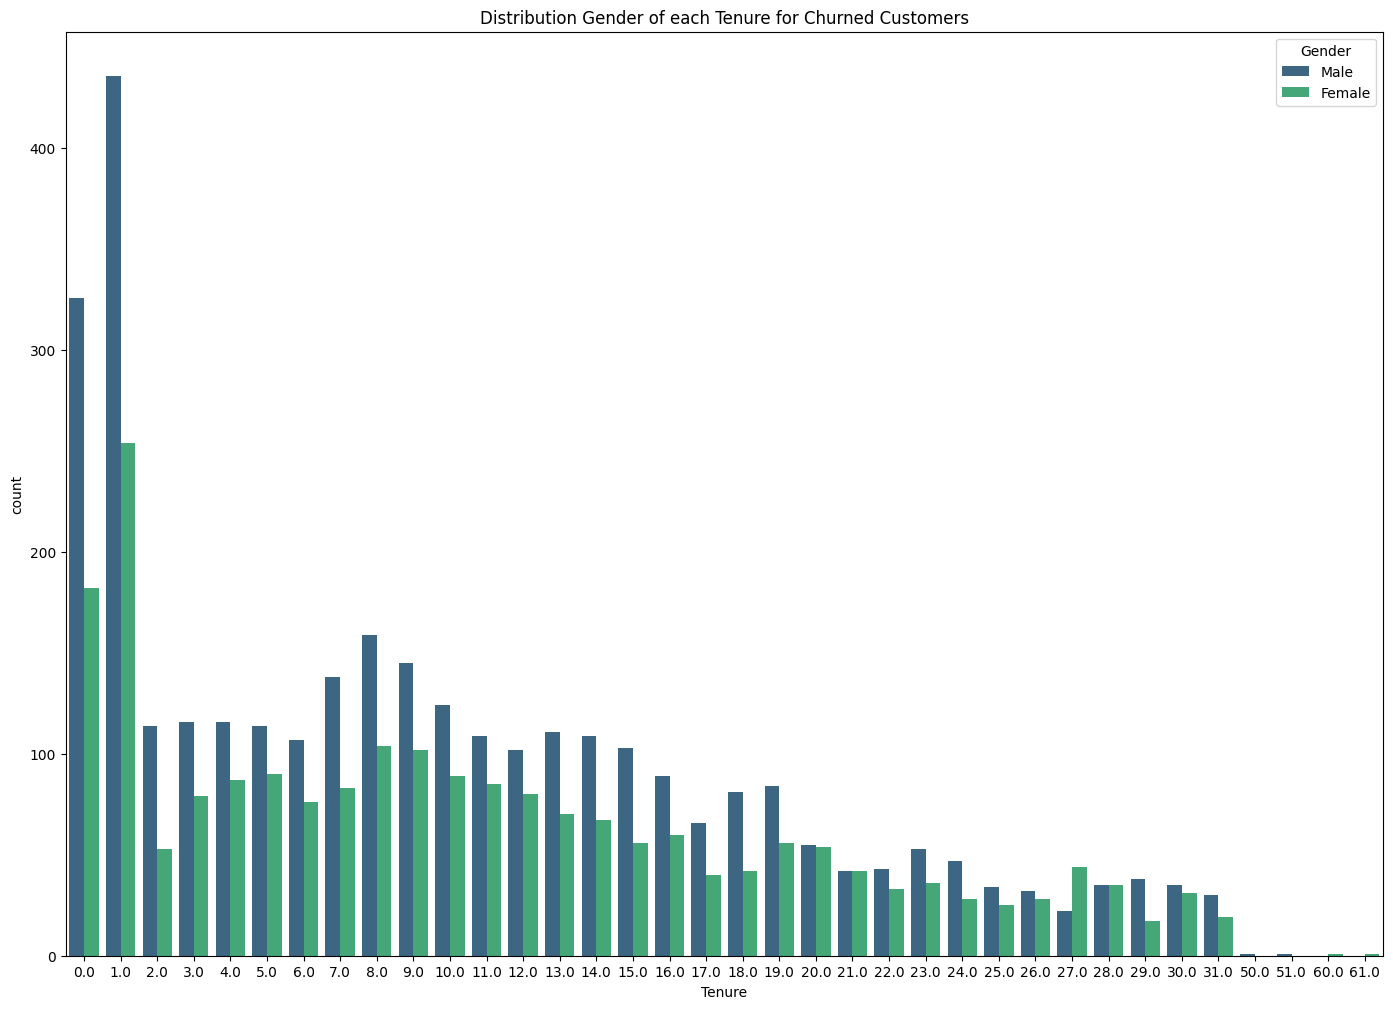

In [ ]:
plt.figure(figsize=(17,12))
sns.countplot(x='Tenure', hue='Gender', palette='viridis', data=df_original)
plt.title("Distribution Gender of each Tenure for Churned Customers")
plt.show()

From the graph , it can be seen that men churn more than women in subscription periods of less than 2 months. This shows that men were more disloyal than women during that period. Apart from that, most men like to try many applications compared to women who, if they are comfortable with one application, will be loyal to that application.

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(data_enc.drop('Churn', axis=1), data_enc.Churn)


In [ ]:
X_test

In [ ]:
X_train

# Model Building

Choose appropriate machine learning algorithms for churn prediction, such as logistic regression, decision trees, random forests, and more



#  Model Evaluation
 *   Evaluate model performance using metrics such as accuracy, precision,
     recall, F1-score, ROC AUC, and confusion matrix.
 *   Compare different models and select the best-performing one based on e valuation metrics and business requirements.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_original is your DataFrame containing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_original[['Tenure', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear']])
df_original[['Tenure', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear']] = scaled_features


In [1]:
# Assuming df_original is your DataFrame containing the data
df_original['TotalDevices'] = df_original['NumberOfDeviceRegistered'] + df_original['NumberOfAddress']


NameError: name 'df_original' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming logreg_model is your trained logistic regression model
y_pred = logreg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


NameError: name 'logreg_model' is not defined

In [ ]:
# Assuming rf_model is your trained random forest model
y_pred_rf = rf_model.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9609375
Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1186
         1.0       0.92      0.82      0.87       222

    accuracy                           0.96      1408
   macro avg       0.95      0.90      0.92      1408
weighted avg       0.96      0.96      0.96      1408



In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: Must pass 2-d input. shape=()

<Figure size 800x600 with 0 Axes>

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=selected_features)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()

NameError: name 'selected_features' is not defined

In [ ]:
import plotly.express as px

fig = px.scatter(data_enc, x='Tenure', y='OrderAmountHikeFromlastYear', color='Churn', hover_data=['CashbackAmount'], title='Tenure vs. Order Amount Hike')
fig.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df_segmentation = df_original[['OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount']]
kmeans.fit(df_segmentation)
df_segmentation['Segment'] = kmeans.labels_
sns.scatterplot(x='OrderAmountHikeFromlastYear', y='CashbackAmount', hue='Segment', data=df_segmentation)
plt.title('Customer Segmentation Analysis')
plt.show()





# Results and analyisis

#  conclusion and Recommendation


#  Dashboard

In [5]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 14.3 MB/s eta 0:00:00


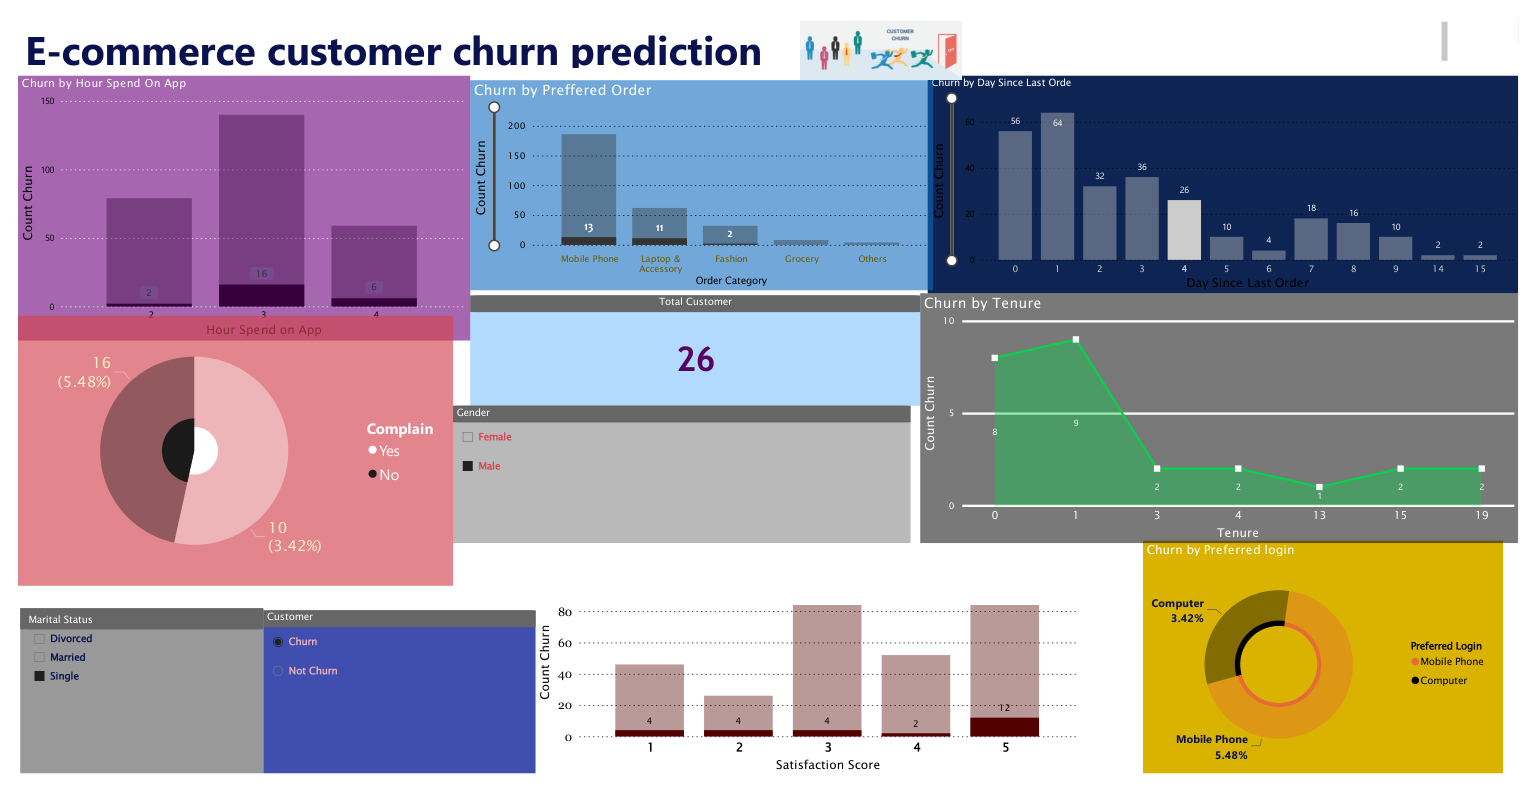

In [7]:
import fitz

# Open the PDF file
pdf_file = 'DV dashboard1.pdf'
doc = fitz.open(pdf_file)

# Get the first page (index 0)
page = doc[0]

# Get the pixel data of the page as a PNG image
image_data = page.get_pixmap()

# Save the image data to a file
image_file = 'output_image.png'
image_data.save(image_file)

# Close the PDF file
doc.close()

# Display the saved image file
from IPython.display import Image
Image(filename=image_file)
